<center><h2 style="text-decoration:"> Predictive Modeling for Store Sales at Corporation Favorita</h2></center>

##### <h3 style="text-decoration:">`Project Description`</h3>
<br>This project focuses on conducting a time series regression analysis to predict store sales at Corporation Favorita, a major grocery retailer based in Ecuador. The objective is to develop a robust predictive model that utilizes time-dependent data to forecast unit sales for various items across different Favorita stores. Leveraging regression techniques, the analysis aims to uncover relationships between sales and key factors such as promotions, oil prices, holidays, and other external variables. Through rigorous modeling and analysis of temporal patterns, the goal is to enhance the accuracy of sales predictions and provide valuable insights for optimizing business strategies.</br>

#####
**Key Stakeholders**

Stakeholders include Corporation Favorita's management, sales and marketing teams, store managers, and data science team.

**Analytical Goals**
- Handle missing values in the datasets by imputation techniques such as mean, median, or mode.
- Address outliers in sales data that may skew the model's predictions by applying robust statistical methods or trimming techniques.
- Normalize or scale numerical features to ensure uniformity and improve model performance.
- Encode categorical variables using techniques such as one-hot encoding or label encoding.
- Build time series regression models such as SARIMA, ARIMA, XGBoost, Linear Regression etc. to capture seasonality and trends in sales data.
- Validate models using cross-validation techniques and assess their performance metrics such as RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).
- Create insightful visualizations and dashboards for sales analysis and forecasting.

**Success Criteria**
- Achieve a 0.2 RMSE (Root Mean Squared Error) in sales forecasting models.
- Improve inventory management efficiency and reduce stockout instances.

**Constraints and Assumptions**
- Assumption: Historical sales data is representative of future demand patterns.
- Constraint: Limited availability of real-time sales data for model training.

**Data Requirements**
- Utilize data from train.csv, stores.csv, holidays_events.csv, oil.csv, and transaction.csv for analysis.
- Include features such as store_nbr, family, onpromotion, store metadata, oil prices, holidays, and transactional data.

**Business Impact**
- Enhance customer satisfaction through better product availability.
- Optimize inventory management, leading to cost savings and improved operational efficiency.

##### Hypothesis

`Null Hypothesis (Ho):` Holidays do not have a significant effect on the sales 

`Alternate Hypothesis (Ha):` Holidays have a significant effect on the sales

**Analytical Business Questions**

1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
4. Did the earthquake impact sales?
5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
6. Are sales affected by promotions, oil prices and holidays?
7. What analysis can we get from the date and its extractable features?
8. Which product family and stores did the promotions affect.
9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

##### `Data Understanding`

##### File Descriptions and Data Field Information

**train.csv**

- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

- store_nbr identifies the store at which the products are sold.

- family identifies the type of product sold.

- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

**test.csv**

- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

- The dates in the test data are for the 15 days after the last date in the training data.

**transaction.csv**

- Contains date, store_nbr and transaction made on that specific date.

**sample_submission.csv**

- A sample submission file in the correct format.

**stores.csv**

- Store metadata, including city, state, type, and cluster.

- cluster is a grouping of similar stores.

**oil.csv**

- Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

###### 
**holidays_events.csv**
Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was celebrated, look for the corresponding row where type is Transfer.

For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

**Additional Notes**

- Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

##### **Import necessary libraries**

In [136]:
# Environment Variables:
from dotenv import dotenv_values 

# Database Connectivity:
import pyodbc 

# Data Manipulation and Analysis:
import numpy as np
import pandas as pd       
import polars as pl 

# Data Visualization:
from sklearn.pipeline import Pipeline
import seaborn as sns
import seaborn_polars as snl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import hvplot.polars
import plotly.express as px
import squarify

# Date Manipulation:
from pandas import DateOffset
import matplotlib.dates as mdates

# Data Transformation and Preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Statistical Analysis:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import stats

# Machine Learning:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# from catboost import CatBoostRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, root_mean_squared_error

# Utility Packages:
import joblib
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Data Serialization:
import pyarrow as pa

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


#### `Getting Datasets from Database`

In [2]:
# Load environment variables
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")


In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Use the connect method of pyodbc library and pass in the connection string
connection = pyodbc.connect(connection_string)

In [5]:
# sql query to get oil data
query1 = "SELECT * FROM dbo.oil"
oil_dataset = pl.read_database(query1, connection)

# sql query to get holidays_events
query2 = "SELECT * FROM dbo.holidays_events"
holiday_dataset =  pl.read_database(query2, connection)

#sql query to get stores
query3 = "SELECT * FROM dbo.stores"
store_dataset =  pl.read_database(query3, connection)

In [6]:
oil_dataset.head()

date,dcoilwtico
str,f64
"""2013-01-01""",null
"""2013-01-02""",93.139999
"""2013-01-03""",92.970001
"""2013-01-04""",93.120003
"""2013-01-07""",93.199997


This `to_date `function takes two parameters: df, which represents a DataFrame or Table object, and date_col, which is a string containing the name of the column to be converted to the date type.

In [7]:
def to_date(df, date_col):
    # Convert date column to date type
    df = df.with_columns(df[date_col].cast(pl.Date))
    
    # Sort the dataframe using the date column
    df = df.sort(date_col)
        
    return df

In [8]:
# Convert date column to date type
oil_dataset = to_date(oil_dataset, 'date')
oil_dataset

date,dcoilwtico
date,f64
2013-01-01,null
2013-01-02,93.139999
2013-01-03,92.970001
2013-01-04,93.120003
2013-01-07,93.199997
…,…
2017-08-25,47.650002
2017-08-28,46.400002
2017-08-29,46.459999


In [9]:
oil_dataset.glimpse()

Rows: 1218
Columns: 2
$ date       <date> 2013-01-01, 2013-01-02, 2013-01-03, 2013-01-04, 2013-01-07, 2013-01-08, 2013-01-09, 2013-01-10, 2013-01-11, 2013-01-14
$ dcoilwtico  <f64> None, 93.13999938964844, 92.97000122070312, 93.12000274658203, 93.19999694824219, 93.20999908447266, 93.08000183105469, 93.80999755859375, 93.5999984741211, 94.2699966430664



In [10]:
oil_dataset.null_count()

date,dcoilwtico
u32,u32
0,43


In [11]:
holiday_dataset.head(5)

date,type,locale,locale_name,description,transferred
str,str,str,str,str,bool
"""2012-03-02""","""Holiday""","""Local""","""Manta""","""Fundacion de Manta""",false
"""2012-04-01""","""Holiday""","""Regional""","""Cotopaxi""","""Provincializacion de Cotopaxi""",false
"""2012-04-12""","""Holiday""","""Local""","""Cuenca""","""Fundacion de Cuenca""",false
"""2012-04-14""","""Holiday""","""Local""","""Libertad""","""Cantonizacion de Libertad""",false
"""2012-04-21""","""Holiday""","""Local""","""Riobamba""","""Cantonizacion de Riobamba""",false


In [12]:
# Convert date column to datetime type
holiday_dataset = to_date(holiday_dataset, 'date')
holiday_dataset

date,type,locale,locale_name,description,transferred
date,str,str,str,str,bool
2012-03-02,"""Holiday""","""Local""","""Manta""","""Fundacion de Manta""",false
2012-04-01,"""Holiday""","""Regional""","""Cotopaxi""","""Provincializacion de Cotopaxi""",false
2012-04-12,"""Holiday""","""Local""","""Cuenca""","""Fundacion de Cuenca""",false
2012-04-14,"""Holiday""","""Local""","""Libertad""","""Cantonizacion de Libertad""",false
2012-04-21,"""Holiday""","""Local""","""Riobamba""","""Cantonizacion de Riobamba""",false
…,…,…,…,…,…
2017-12-22,"""Additional""","""National""","""Ecuador""","""Navidad-3""",false
2017-12-23,"""Additional""","""National""","""Ecuador""","""Navidad-2""",false
2017-12-24,"""Additional""","""National""","""Ecuador""","""Navidad-1""",false


In [13]:
holiday_dataset.glimpse()

Rows: 350
Columns: 6
$ date        <date> 2012-03-02, 2012-04-01, 2012-04-12, 2012-04-14, 2012-04-21, 2012-05-12, 2012-06-23, 2012-06-25, 2012-06-25, 2012-06-25
$ type         <str> 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday'
$ locale       <str> 'Local', 'Regional', 'Local', 'Local', 'Local', 'Local', 'Local', 'Regional', 'Local', 'Local'
$ locale_name  <str> 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Latacunga', 'Machala'
$ description  <str> 'Fundacion de Manta', 'Provincializacion de Cotopaxi', 'Fundacion de Cuenca', 'Cantonizacion de Libertad', 'Cantonizacion de Riobamba', 'Cantonizacion del Puyo', 'Cantonizacion de Guaranda', 'Provincializacion de Imbabura', 'Cantonizacion de Latacunga', 'Fundacion de Machala'
$ transferred <bool> False, False, False, False, False, False, False, False, False, False



In [14]:
holiday_dataset.null_count()

date,type,locale,locale_name,description,transferred
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [15]:
store_dataset.head(5)

store_nbr,city,state,type,cluster
i64,str,str,str,i64
1,"""Quito""","""Pichincha""","""D""",13
2,"""Quito""","""Pichincha""","""D""",13
3,"""Quito""","""Pichincha""","""D""",8
4,"""Quito""","""Pichincha""","""D""",9
5,"""Santo Domingo""","""Santo Domingo de los Tsachilas""","""D""",4


In [16]:
store_dataset.glimpse()

Rows: 54
Columns: 5
$ store_nbr <i64> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ city      <str> 'Quito', 'Quito', 'Quito', 'Quito', 'Santo Domingo', 'Quito', 'Quito', 'Quito', 'Quito', 'Quito'
$ state     <str> 'Pichincha', 'Pichincha', 'Pichincha', 'Pichincha', 'Santo Domingo de los Tsachilas', 'Pichincha', 'Pichincha', 'Pichincha', 'Pichincha', 'Pichincha'
$ type      <str> 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'B', 'C'
$ cluster   <i64> 13, 13, 8, 9, 4, 13, 8, 8, 6, 15



In [17]:
store_dataset.null_count()

store_nbr,city,state,type,cluster
u32,u32,u32,u32,u32
0,0,0,0,0


`Getting the rest of the Datasets`

In [18]:
# Loading the train Data
train_dataset = pl.read_csv('Datasets/train.csv')

# Loading the transaction data
transaction_dataset =  pl.read_csv('Datasets/transactions.csv')

In [19]:
transaction_dataset.head(3)

date,store_nbr,transactions
str,i64,i64
"""2013-01-01""",25,770
"""2013-01-02""",1,2111
"""2013-01-02""",2,2358


In [20]:
# Convert date column to date type
transaction_dataset = to_date(transaction_dataset, 'date')
transaction_dataset

date,store_nbr,transactions
date,i64,i64
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
…,…,…
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255


In [21]:
transaction_dataset.glimpse()

Rows: 83488
Columns: 3
$ date         <date> 2013-01-01, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02
$ store_nbr     <i64> 25, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ transactions  <i64> 770, 2111, 2358, 3487, 1922, 1903, 2143, 1874, 3250, 2940



In [22]:
train_dataset.null_count()


id,date,store_nbr,family,sales,onpromotion
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [23]:
train_dataset.head(5)

id,date,store_nbr,family,sales,onpromotion
i64,str,i64,str,f64,i64
0,"""2013-01-01""",1,"""AUTOMOTIVE""",0.0,0
1,"""2013-01-01""",1,"""BABY CARE""",0.0,0
2,"""2013-01-01""",1,"""BEAUTY""",0.0,0
3,"""2013-01-01""",1,"""BEVERAGES""",0.0,0
4,"""2013-01-01""",1,"""BOOKS""",0.0,0


In [24]:
# Convert date column in train df to date type
train_dataset = to_date(train_dataset, 'date')

In [25]:
train_dataset.head()

id,date,store_nbr,family,sales,onpromotion
i64,date,i64,str,f64,i64
0,2013-01-01,1,"""AUTOMOTIVE""",0.0,0
1,2013-01-01,1,"""BABY CARE""",0.0,0
2,2013-01-01,1,"""BEAUTY""",0.0,0
3,2013-01-01,1,"""BEVERAGES""",0.0,0
4,2013-01-01,1,"""BOOKS""",0.0,0


In [26]:
# Checking  for unique values in all the columns
cols = train_dataset.columns

results = []

for col in cols:
    
    unique_values = train_dataset[col].unique()
    num_unique_values = train_dataset[col].n_unique()
    results.append([col, unique_values, num_unique_values])

results_df = pl.DataFrame(results, schema=['Column', 'Unique_Values', 'Num_Unique_Values'])
results_df

Column,Unique_Values,Num_Unique_Values
str,list[str],i64
"""id""","[""0"", ""1"", … ""3000887""]",3000888
"""date""","[""2013-01-01"", ""2013-01-02"", … ""2017-08-15""]",1684
"""store_nbr""","[""1"", ""2"", … ""54""]",54
"""family""","[""DAIRY"", ""BABY CARE"", … ""HOME CARE""]",33
"""sales""","[""0.0"", ""0.122"", … ""124717.0""]",379610
"""onpromotion""","[""0"", ""1"", … ""741""]",362


In [27]:
train_dataset.head()

id,date,store_nbr,family,sales,onpromotion
i64,date,i64,str,f64,i64
0,2013-01-01,1,"""AUTOMOTIVE""",0.0,0
1,2013-01-01,1,"""BABY CARE""",0.0,0
2,2013-01-01,1,"""BEAUTY""",0.0,0
3,2013-01-01,1,"""BEVERAGES""",0.0,0
4,2013-01-01,1,"""BOOKS""",0.0,0


In [28]:
transaction_dataset.glimpse()


Rows: 83488
Columns: 3
$ date         <date> 2013-01-01, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02, 2013-01-02
$ store_nbr     <i64> 25, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ transactions  <i64> 770, 2111, 2358, 3487, 1922, 1903, 2143, 1874, 3250, 2940



#### `EDA on the train Dataset`

#### `EDA on the train Dataset`

In [29]:
# Checking the descriptive statistics of the train data set
train_dataset.describe()

statistic,id,date,store_nbr,family,sales,onpromotion
str,f64,str,f64,str,f64,f64
"""count""",3.000888e6,"""3000888""",3.000888e6,"""3000888""",3.000888e6,3.000888e6
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0
"""mean""",1500443.5,"""2015-04-24""",27.5,null,357.775749,2.60277
"""std""",866281.891642,null,15.585787,null,1101.997721,12.218882
"""min""",0.0,"""2013-01-01""",1.0,"""AUTOMOTIVE""",0.0,0.0
"""25%""",750222.0,"""2014-02-27""",14.0,null,0.0,0.0
"""50%""",1.500444e6,"""2015-04-25""",28.0,null,11.0,0.0
"""75%""",2.250665e6,"""2016-06-19""",41.0,null,195.847,0.0
"""max""",3.000887e6,"""2017-08-15""",54.0,"""SEAFOOD""",124717.0,741.0


In [30]:
# Checking  for unique values in all the columns
cols = train_dataset.columns

results = []

for col in cols:
    
    unique_values = train_dataset[col].unique()
    num_unique_values = train_dataset[col].n_unique()
    results.append([col, unique_values, num_unique_values])

results_df = pl.DataFrame(results, schema=['Column', 'Unique_Values', 'Num_Unique_Values'])
results_df

Column,Unique_Values,Num_Unique_Values
str,list[str],i64
"""id""","[""0"", ""1"", … ""3000887""]",3000888
"""date""","[""2013-01-01"", ""2013-01-02"", … ""2017-08-15""]",1684
"""store_nbr""","[""1"", ""2"", … ""54""]",54
"""family""","[""PREPARED FOODS"", ""GROCERY II"", … ""PRODUCE""]",33
"""sales""","[""0.0"", ""0.122"", … ""124717.0""]",379610
"""onpromotion""","[""0"", ""1"", … ""741""]",362


Checking for Data Completness and Missing dates in the Date column

This `start_end_date` finds the start and end dates from a DataFrame based on a 'date' column, print them, and return the start and end dates as a tuple.

In [31]:
def start_end_date(df):
    # Start of the data using the date
    start_date = df['date'].min()
 
    # End of the data using the date
    end_date = df['date'].max()
 
    # Print the start and end date of the data
    print(f'Start date is {start_date}')
    print(f'End date is {end_date}')
   
    return start_date, end_date

In [32]:
start_date, end_date = start_end_date(train_dataset)

Start date is 2013-01-01
End date is 2017-08-15


This `missing_dates` function used to find and retrieve the missing dates in a DataFrame based on a 'date' column. 

In [33]:
def missing_dates(df):
    # Getting the date range for the train data set
    date_range = pl.date_range(start = start_date, end = end_date, interval = '1d', eager = True)
    
    # Getting the existing dates
    existing_dates = df['date']

    # Getting the missing dates using the date range and the existing dates
    missing_dates = date_range.filter(~date_range.is_in(existing_dates))
    
    return missing_dates

- Check missing dates

In [34]:
all_missing_dates = missing_dates(train_dataset)
all_missing_dates

literal
date
2013-12-25
2014-12-25
2015-12-25
2016-12-25


In [35]:
# Dropping the Id column since it will not be relevant for the visualizations
train_dataset = train_dataset.drop(columns = ['id'])

In [36]:
train_dataset.shape

(3000888, 5)

In [37]:
# Define the columns to fill
columns = [column for column in train_dataset.columns if column != 'date']
columns

['store_nbr', 'family', 'sales', 'onpromotion']

In [38]:
no_enteries_per_day = (train_dataset.select(pl.col('date').filter(date=pl.col('date').min()))).shape[0]
no_enteries_per_day

1782

In [39]:
no_enteries_per_day * len(all_missing_dates)

7128

- Create missing dataframe using all missing dates, unique store_nbr and unique family category

In [40]:
# Create df with unique values for store_nbr
store_nbr_unique = train_dataset['store_nbr'].unique()

# Create df with unique values for family category
family_unique = train_dataset['family'].unique()

# Create dataframe with missing dates and unique store_nbr and family category
missing_df = pl.DataFrame(
    list(product(all_missing_dates, store_nbr_unique, family_unique)), 
    schema=['date', 'store_nbr', 'family']
)
missing_df.shape

(7128, 3)

- Add sales and onpromotion columns to the missing_df

In [41]:
missing_df = missing_df.with_columns(
    sales=None,
    onpromotion=None,
)
missing_df.glimpse()

Rows: 7128
Columns: 5
$ date        <date> 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25, 2013-12-25
$ store_nbr    <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family       <str> 'LADIESWEAR', 'SCHOOL AND OFFICE SUPPLIES', 'CLEANING', 'PREPARED FOODS', 'FROZEN FOODS', 'GROCERY I', 'DAIRY', 'PERSONAL CARE', 'DELI', 'HARDWARE'
$ sales       <null> None, None, None, None, None, None, None, None, None, None
$ onpromotion <null> None, None, None, None, None, None, None, None, None, None



- Join missing_df to the train_dataset

In [42]:
# Join original train_df with missing_df
train_dataset = train_dataset.vstack(missing_df).sort('date')
train_dataset.glimpse()

Rows: 3008016
Columns: 5
$ date        <date> 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01
$ store_nbr    <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family       <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ sales        <f64> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
$ onpromotion  <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0



In [43]:
train_dataset.null_count()

date,store_nbr,family,sales,onpromotion
u32,u32,u32,u32,u32
0,0,0,7128,7128


- Again, check missing dates

In [44]:
# Check missing dates
all_missing_dates = missing_dates(train_dataset)
all_missing_dates

literal
date


In [45]:
train_dataset.null_count()

date,store_nbr,family,sales,onpromotion
u32,u32,u32,u32,u32
0,0,0,7128,7128


In [46]:
train_dataset.glimpse()

Rows: 3008016
Columns: 5
$ date        <date> 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01
$ store_nbr    <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family       <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ sales        <f64> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
$ onpromotion  <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0



- Fill missing values in sales with 0.0 and onpromotion with 0

In [47]:
# Fill sales with zero strategy
train_dataset = train_dataset.fill_null(strategy="zero")

train_dataset.glimpse()

Rows: 3008016
Columns: 5
$ date        <date> 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01
$ store_nbr    <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family       <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ sales        <f64> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
$ onpromotion  <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0



- Now, there are no missing values in sales and onpromotion columns

In [48]:
train_dataset.null_count()

date,store_nbr,family,sales,onpromotion
u32,u32,u32,u32,u32
0,0,0,0,0


#### **`Feature Engineering`**

In [49]:
# Store original train columns
train_col_org = train_dataset.columns

In [50]:
def date_features(df):    
    # Extracting the year from the date and adding it to the df as a new column
    df = df.with_columns(pl.col('date').dt.year().alias('year'))

    # Extracting the month from the date and adding it to the df as a new column
    df = df.with_columns(pl.col('date').dt.month().alias('month'))

    # Extracting the day from the date and adding it to the df as a new column
    df = df.with_columns(pl.col('date').dt.day().alias('day'))

    # Extracting the weekday from the date and adding it to the df as a new column
    df = df.with_columns(pl.col('date').dt.weekday().alias('weekday'))
        
    # Extracting the quarter from the date and adding it to the df as a new column
    df = df.with_columns(pl.col('date').dt.quarter().alias('quarter'))
    
    return df

# Preview of the train Data frame
train_dataset = date_features(train_dataset)
train_dataset.glimpse()

Rows: 3008016
Columns: 10
$ date        <date> 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01, 2013-01-01
$ store_nbr    <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family       <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ sales        <f64> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
$ onpromotion  <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ year         <i32> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013
$ month         <i8> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ day           <i8> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ weekday       <i8> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
$ quarter       <i8> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1



In [51]:
train_dataset.head(2)

date,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter
date,i64,str,f64,i64,i32,i8,i8,i8,i8
2013-01-01,1,"""AUTOMOTIVE""",0.0,0,2013,1,1,2,1
2013-01-01,1,"""BABY CARE""",0.0,0,2013,1,1,2,1


#### **`Univariate Analysis`**

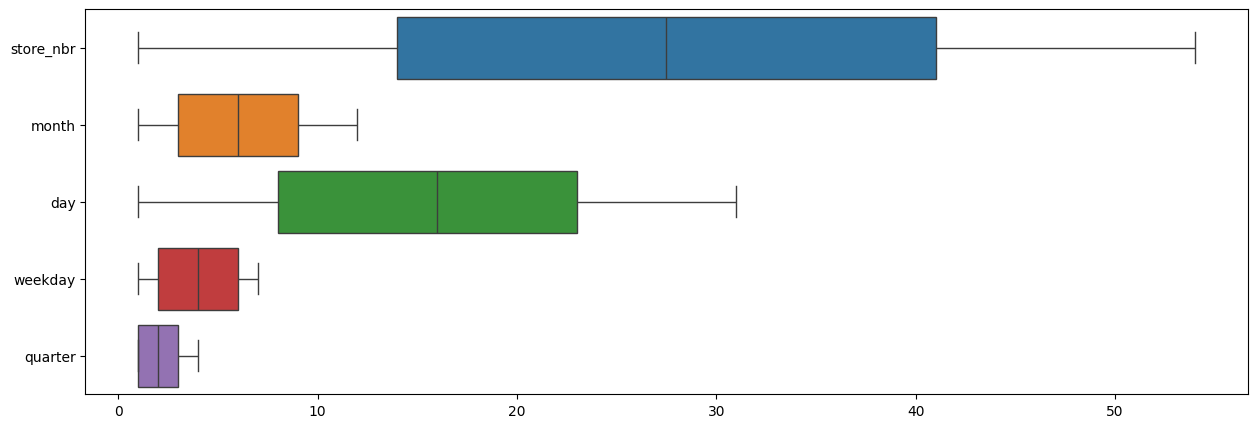

In [52]:
plt.figure(figsize = (15,5))
snl.boxplot(train_dataset.drop(['year', 'sales', 'onpromotion', 'family']), orient = 'h')
plt.show()

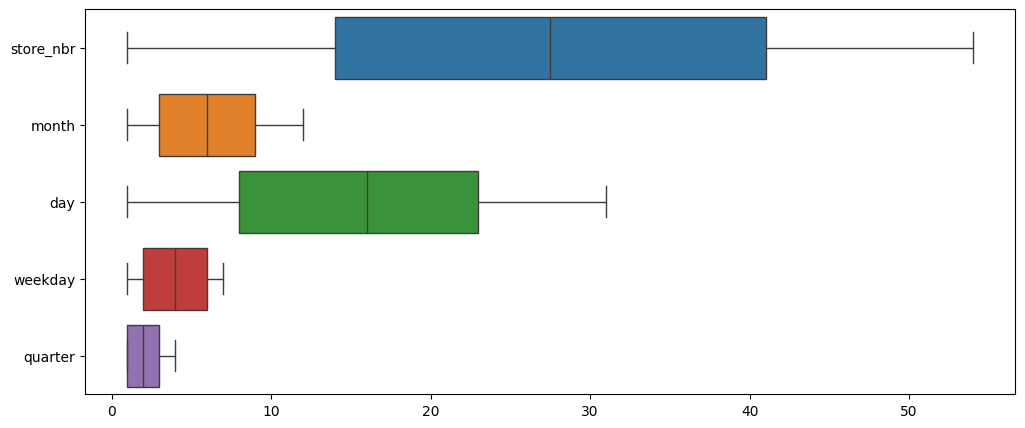

In [53]:
# Select columns to keep for the boxplot
columns_to_keep = [col for col in train_dataset.columns if col not in ['year', 'sales', 'onpromotion', 'family']]
df_for_boxplot = train_dataset.select(columns_to_keep)

# Plotting the boxplot
plt.figure(figsize=(12, 5))
snl.boxplot(df_for_boxplot, orient='h')
plt.show()

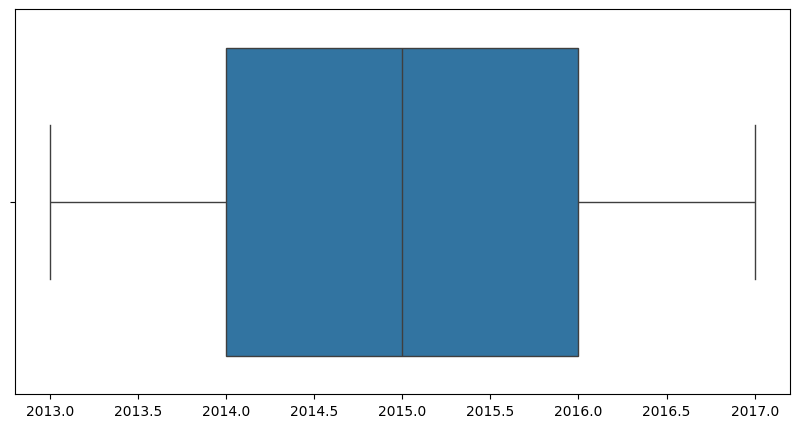

In [54]:
plt.figure(figsize = (10,5))
snl.boxplot(train_dataset['year'], orient = 'h')
plt.show()

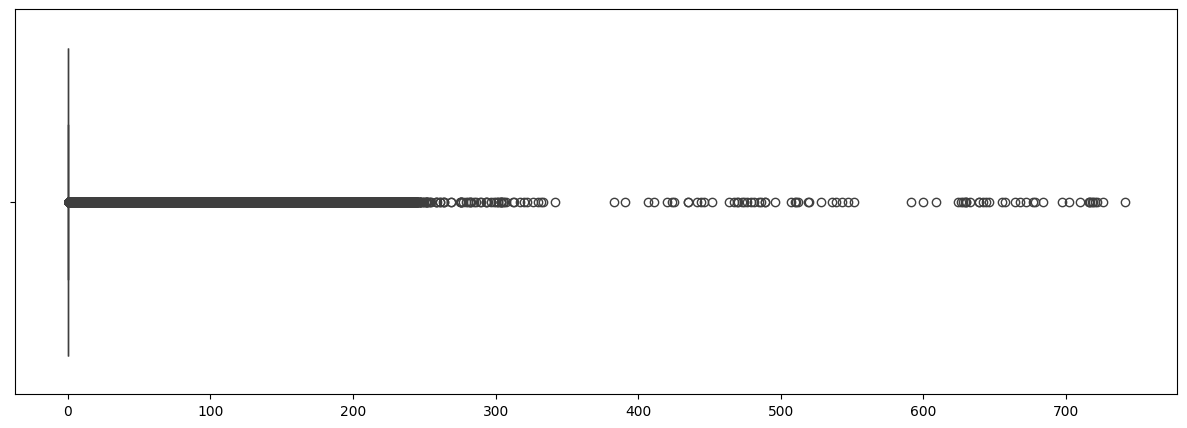

In [55]:
plt.figure(figsize = (15,5))
snl.boxplot(train_dataset['onpromotion'], orient = 'h')
plt.show()

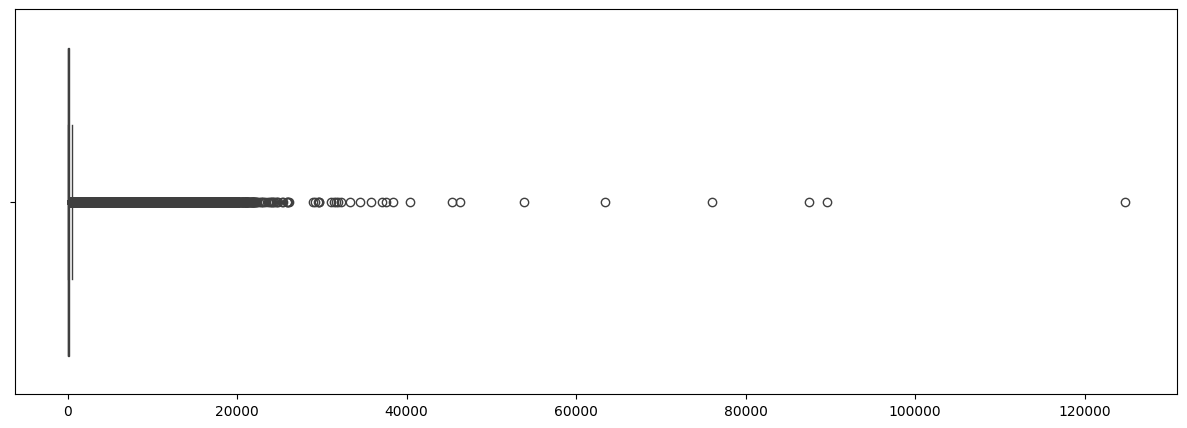

In [56]:
plt.figure(figsize = (15,5))
snl.boxplot(train_dataset['sales'], orient = 'h')
plt.show()

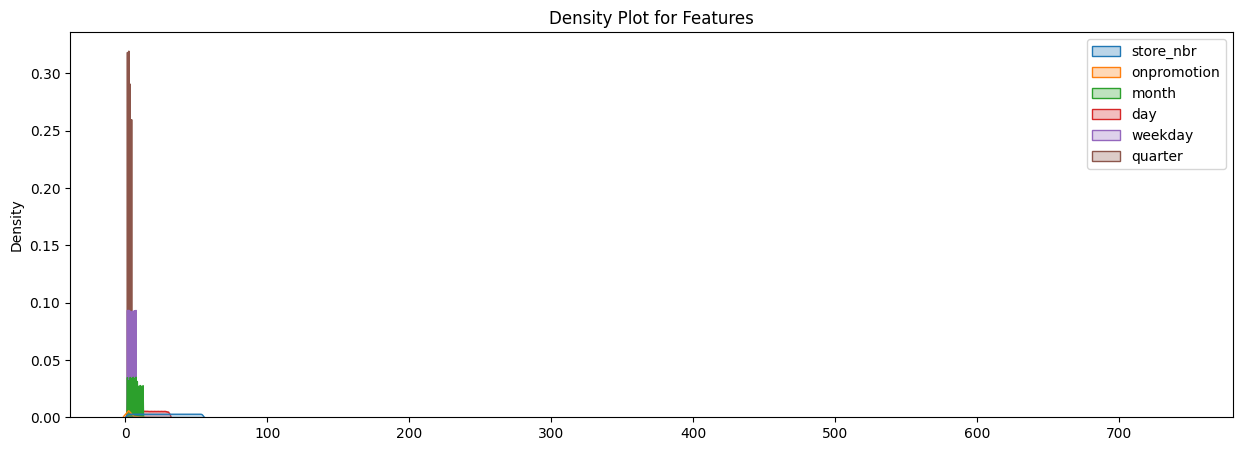

In [57]:
plt.figure(figsize=(15, 5))
snl.kdeplot(train_dataset.drop(columns=['year', 'sales']), alpha=0.3, fill=True)
plt.title('Density Plot for Features')
plt.show()

In [58]:
sales_skew = train_dataset['sales'].skew()
onpromotion_skew = train_dataset['onpromotion'].skew()
store_skew = train_dataset['store_nbr'].skew()
date_skew = train_dataset['date'].skew()

print(f'Sales skewness = {sales_skew}')
print(f'onpromotion skewness = {onpromotion_skew}')
print(f'Store skewness = {store_skew}')
print(f'Date skewness = {date_skew}')

Sales skewness = 7.366958233475781
onpromotion skewness = 11.179500598595624
Store skewness = 0.0
Date skewness = 0.0


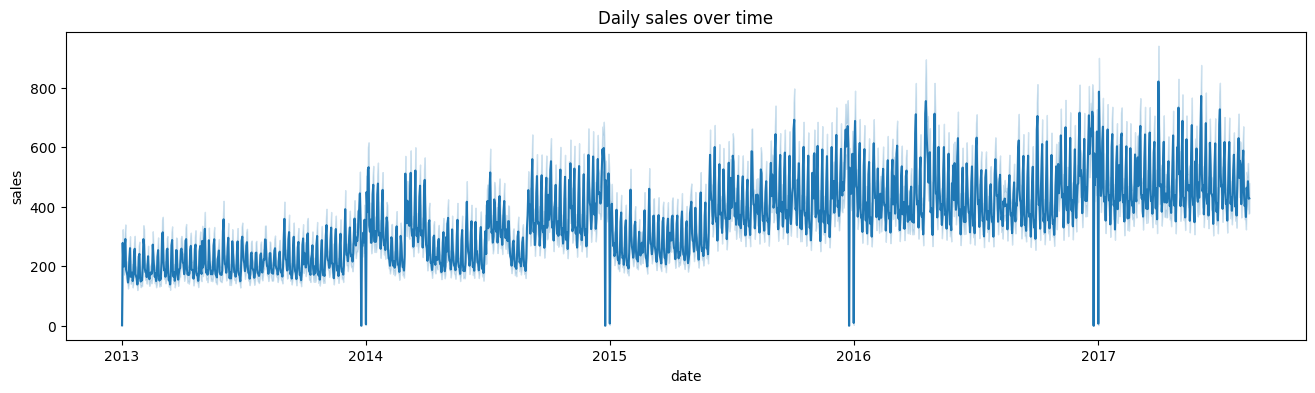

In [59]:
plt.figure(figsize=(16, 4)) 
sns.lineplot(train_dataset, x=train_dataset['date'], y=train_dataset['sales'])
plt.title(f'Daily sales over time')
plt.show()

#### **`Bi-Variate Analysis`**

Exploring relationships

In [60]:
train_df_numeric = train_dataset.select(pl.selectors.by_dtype(pl.Date, pl.INTEGER_DTYPES, pl.FLOAT_DTYPES))

# Getting the correlation of numeric values in the train dataset
correlation = train_df_numeric.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(correlation,
                labels=dict(color="Correlation"),
                x=correlation.columns,
                y=correlation.columns,
                text_auto=True,  # Automatically add text in each cell
)
# Update layout for better readability
fig.update_layout(title="Correlation Heatmap", height=700)

# Set the size of text annotations
fig.update_traces(
    text=correlation.to_numpy(),
    texttemplate="%{text:.4f}",
    textfont_size=12
)
fig.show()

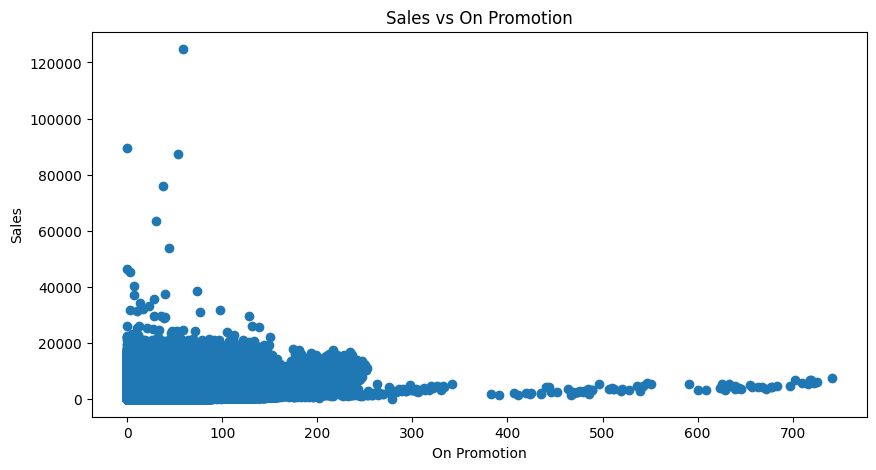

In [61]:
# Visualize relationships between sales and promotion
plt.figure(figsize=(10,5))
plt.scatter(train_dataset['onpromotion'], train_dataset['sales'])
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.title('Sales vs On Promotion')
plt.show()

#### `Decompostion`

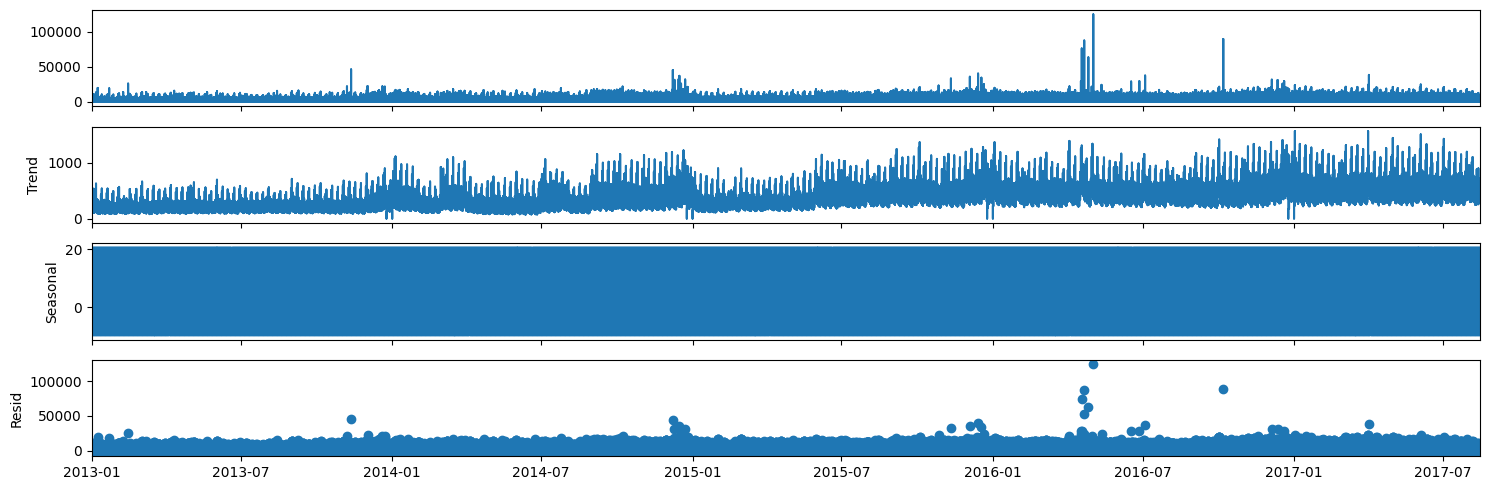

In [62]:
# Creating a data frame for sales and date to use for decomposition
seasonal_df = train_dataset[['date', 'sales']].to_pandas() 

# Setting the date as the index
seasonal_df.set_index('date', inplace=True)

# Using additive model, calculate the additive results for seasons, trends and noise for the sales
additive_results = seasonal_decompose(seasonal_df, model = 'additive', period = 365)

# Update rcParams to set the figure size for the plot
plt.rcParams.update({'figure.figsize': (15, 5)})

# Plot the decomposed components (trend, seasonal, residual)
additive_results.plot()

# Display the plot
plt.show()

In [63]:
# Extract components and create a new DataFrame
decomposition_df = pl.DataFrame({
        'Trend': additive_results.trend,
        'Seasonality': additive_results.seasonal,
        'Residual': additive_results.resid,
        'Observed': additive_results.observed,
            
            }) 
decomposition_df

Trend,Seasonality,Residual,Observed
f64,f64,f64,f64
null,3.132589,null,0.0
null,3.245342,null,0.0
null,0.063797,null,0.0
null,-4.472616,null,0.0
null,-2.799327,null,0.0
…,…,…,…
null,-2.939043,null,438.133
null,0.677141,null,154.553
null,1.958825,null,2419.729


Stationarity Test using `Augmented Dickey-Fuller(ADF)` test

In [64]:
# Resampling the data to weekly and getting the average
resampled_df = train_dataset.group_by_dynamic("date", every="1w").agg(pl.col("sales").mean())

resampled_df.shape

(242, 2)

In [65]:
# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(resampled_df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform differencing if needed for stationarity
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -1.4817509177560266
p-value: 0.542518811098264
Data is not stationary


In [66]:
# Resampling the data to weekly and getting the average
resampled_df = train_dataset.group_by_dynamic("date", every="1w").agg(pl.col("sales").mean())

resampled_df.shape

(242, 2)

In [67]:
# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(resampled_df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform differencing if needed for stationarity
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -1.4817509177560266
p-value: 0.542518811098264
Data is not stationary


- Visualization of the Stationarity using Rolling statistics

In [68]:
# Getting the rolling Average
rolling_average = train_dataset.rolling(index_column="date", period="1w").agg(pl.mean("sales").alias("sales_average"))

# Getting the rolling Standard Deviation
rolling_std = train_dataset.rolling(index_column="date", period="1w").agg(pl.std("sales").alias("sales_std"))

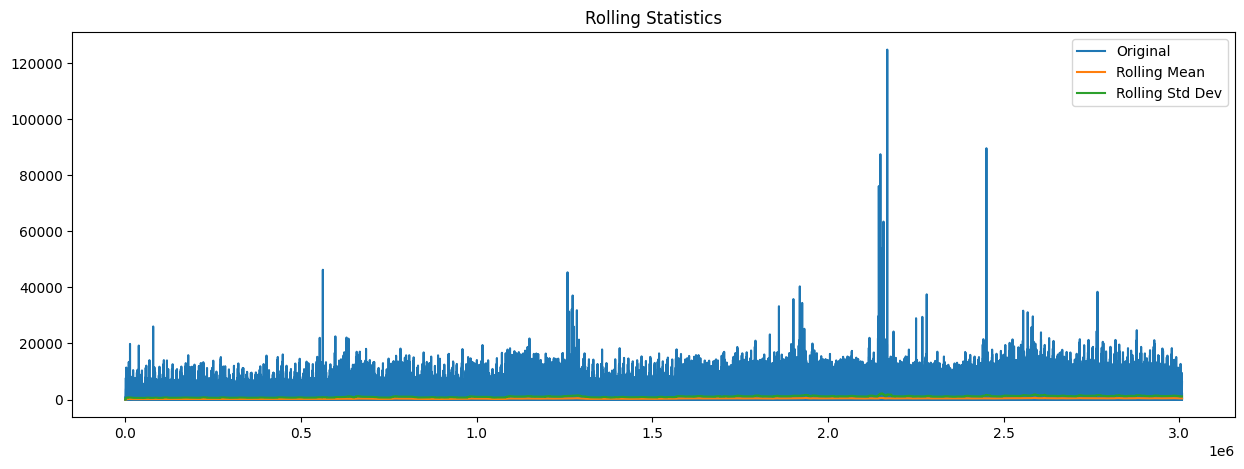

In [69]:
# Create both figure and axis objects
fig, ax = plt.subplots(figsize=(15, 5))
 
# Make plot
ax.plot(train_dataset['sales'], label = 'Original')
ax.plot(rolling_average['sales_average'], label = 'Rolling Mean')
ax.plot(rolling_std['sales_std'], label = 'Rolling Std Dev')
ax.legend(loc = 'best')
ax.set_title("Rolling Statistics")

# Show the plot
plt.show()

#### **`Answering the Analytical Questions`**

*Question 1. Is the train dataset complete (has all the required dates)?*

In [70]:
# Calling my missing_dates function with train_dataset 
missing_dates_df = missing_dates(train_dataset)

# Print message
if missing_dates_df.shape[0] == 0:
    print("The train dataset is complete for all the required dates.")
else:
    print("The train dataset is not complete for all required dates.")
    print("Missing dates:")
    print(missing_dates_df)

The train dataset is complete for all the required dates.


- This question has been addressed in the EDA of the train dataset. After conducting a comprehensive analysis, It can be seen that four dates were missing. These have been filled with a constant sales value of 0.0, as the stores were closed on these days.

*Question 2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?*

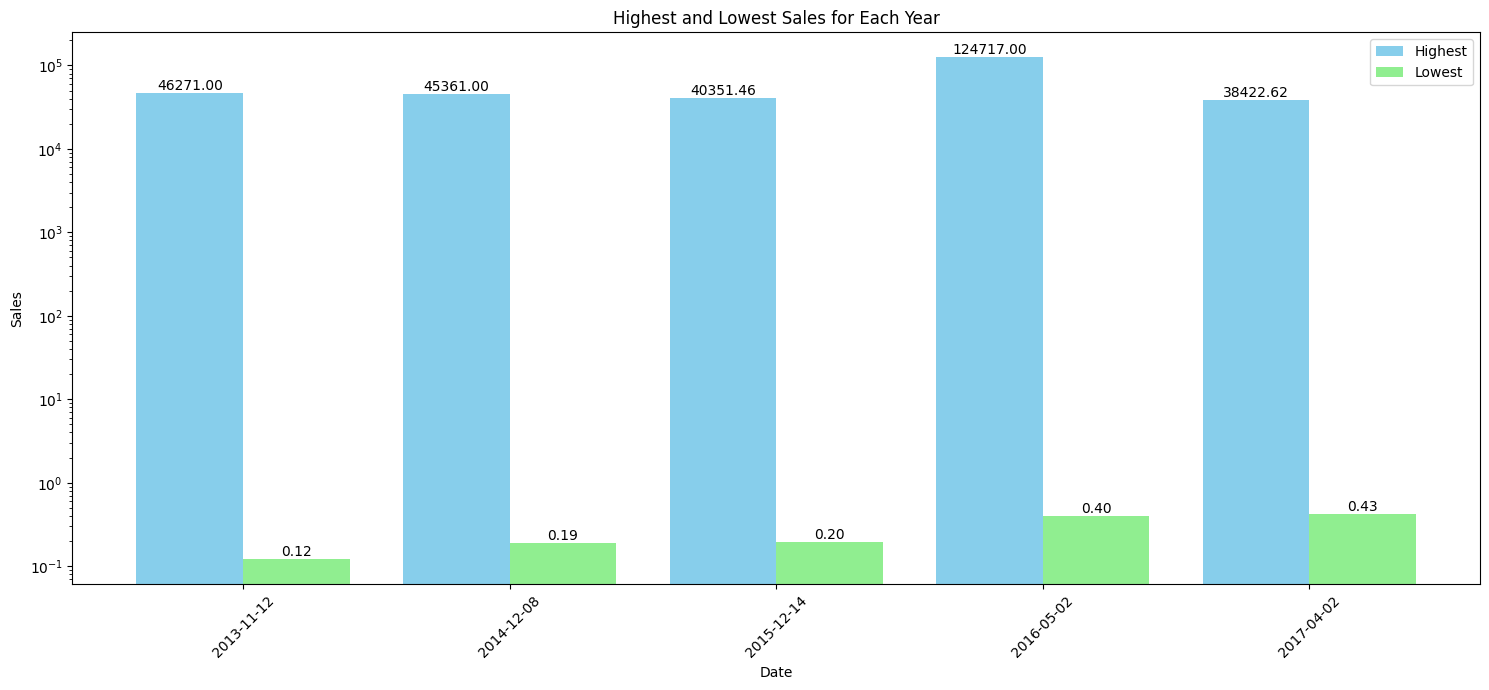

In [71]:
# Define the years to filter the data
years = [2013, 2014, 2015, 2016, 2017]

# Initialize empty lists to store highest/lowest sales for each year
highest_sales = []
lowest_sales = []
dates = []

# Loop through each year to filter data and calculate highest/lowest sales
for year in years:
    # Filter the train dataframe for the specific year
    filtered_df = train_dataset.filter(pl.col('date').dt.year() == year)
    
    # Filter the train dataframe to get the values that do not include the days when the store was closed
    filtered_df = filtered_df.filter(pl.col('sales') != 0)
    
    # Calculate the highest sales values by getting the top 1 value and sorting in descending order
    highest_sales_df = filtered_df.sort('sales').reverse().slice(0, 1)
    
    # Calculate the lowest sales values by getting the bottom 1 value and sorting in ascending order
    lowest_sales_df = filtered_df.sort('sales').slice(0, 1)
    
    # Append the highest/lowest sales DataFrames to the respective lists
    highest_sales.append(highest_sales_df)
    lowest_sales.append(lowest_sales_df)
    
    # Append the date of the highest sale to the dates list
    dates.append(highest_sales_df['date'].to_list()[0])

# Create a bar plot for each year
plt.figure(figsize=(15, 7))

# Plotting highest sales for each year
bars1 = plt.bar([i - 0.2 for i in range(len(years))], [hs['sales'].to_list()[0] for hs in highest_sales], width=0.4, label='Highest', color='skyblue')

# Plotting lowest sales for each year
bars2 = plt.bar([i + 0.2 for i in range(len(years))], [ls['sales'].to_list()[0] for ls in lowest_sales], width=0.4, label='Lowest', color='lightgreen')

# Set labels for x and y axes
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Highest and Lowest Sales for Each Year')
plt.xticks([i for i in range(len(dates))], dates, rotation=45)
plt.legend()
plt.yscale('log')

# Function to add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 '%.2f' % height, ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

**Key Insight**

**Lowest Sales:** The lowest sales figures are consistently close to zero each year, likely reflecting days with very minimal transactions or potentially days immediately after holidays.
    
**Highest Sales Variability:** The highest sales vary significantly each year, with the peak in 2016 being particularly high compared to other years.
    
**Annual Peaks:** High sales days often occur towards the end of the year, around November and December, except for the notable peak in 2016, which occurred in May.

*Question 3. Compare the sales for each month across the years and determine which month of which year had the highest sales.*

In [72]:
sales_2013 = train_dataset.filter(train_dataset['year'] == 2013)
sales_by_month_2013 = sales_2013.groupby('month').agg(pl.col("sales").sum())

sales_2014 = train_dataset.filter(train_dataset['year'] == 2014)
sales_by_month_2014 = sales_2014.groupby('month').agg(pl.col("sales").sum())

sales_2015 = train_dataset.filter(train_dataset['year'] == 2015)
sales_by_month_2015 = sales_2015.groupby('month').agg(pl.col("sales").sum())

sales_2016 = train_dataset.filter(train_dataset['year'] == 2016)
sales_by_month_2016 = sales_2016.groupby('month').agg(pl.col("sales").sum())

sales_2017 = train_dataset.filter(train_dataset['year'] == 2017)
sales_by_month_2017 = sales_2017.groupby('month').agg(pl.col("sales").sum())

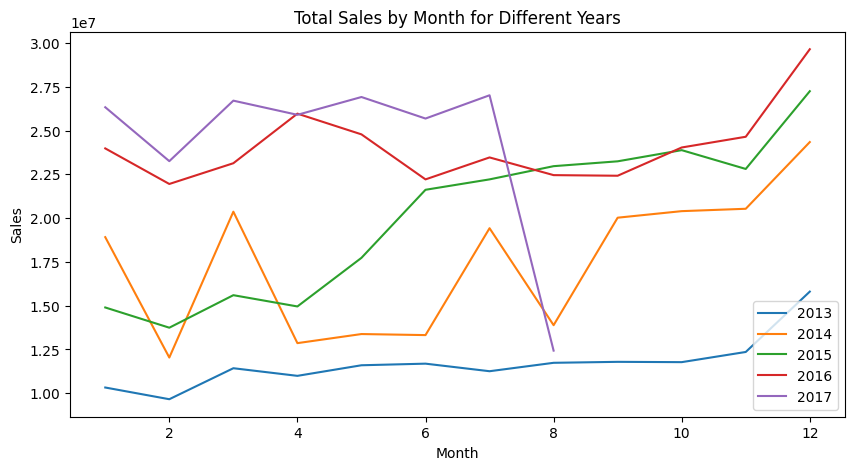

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_by_month_2013, x='month', y='sales', label='2013')
sns.lineplot(data=sales_by_month_2014, x='month', y='sales', label='2014')
sns.lineplot(data=sales_by_month_2015, x='month', y='sales', label='2015')
sns.lineplot(data=sales_by_month_2016, x='month', y='sales', label='2016')
sns.lineplot(data=sales_by_month_2017, x='month', y='sales', label='2017')

plt.legend()
plt.title('Total Sales by Month for Different Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Key Insight**

The month with the highest total sales was December, and the year with the highest sales across most months was 2016, making December 2016 the highest sales month/year combination depicted in this multi-year sales data. On the other end, the month with the lowest total sales was January 2013, with sales around 1.1.

*Question 4. Did the earthquake impact sales?*

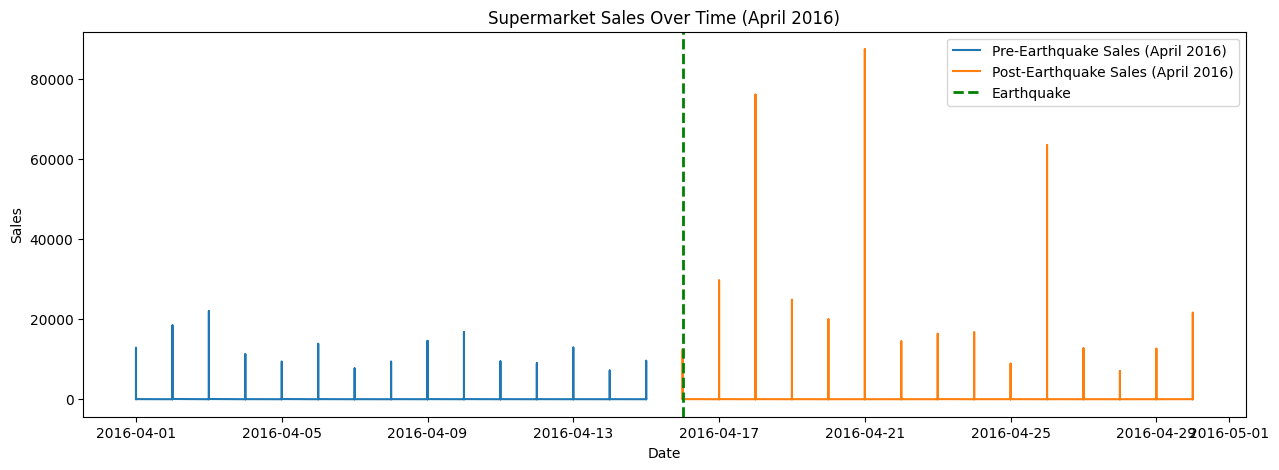

In [74]:
# Filter data for the period before and after the earthquake in April 2016
pre_earthq_april_2016 = train_dataset.filter(
    (train_dataset['date'] < pl.date(2016, 4, 16)) & (train_dataset['year'] == 2016) & (train_dataset['month'] == 4)
)
post_earthq_april_2016 = train_dataset.filter(
    (train_dataset['date'] >= pl.date(2016, 4, 16)) & (train_dataset['year'] == 2016) & (train_dataset['month'] == 4)
)

# Convert Polars DataFrame back to pandas DataFrame for plotting
pre_earthq_april_2016 = pre_earthq_april_2016.to_pandas()
post_earthq_april_2016 = post_earthq_april_2016.to_pandas()

# Plot sales over time using Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(pre_earthq_april_2016['date'], pre_earthq_april_2016['sales'], label='Pre-Earthquake Sales (April 2016)')
plt.plot(post_earthq_april_2016['date'], post_earthq_april_2016['sales'], label='Post-Earthquake Sales (April 2016)')

# Earthquake date
earthq_date = '2016-04-16'

# Convert the earthquake date to a matplotlib-compatible format
earthq_num = mdates.datestr2num(earthq_date)

# Add a vertical line at the date of the earthquake
plt.axvline(x=earthq_num, color='green', linestyle='--', linewidth=2, label='Earthquake')

plt.title('Supermarket Sales Over Time (April 2016)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Key Insight**

The earthquake caused a sharp increase in sales, demonstrating a heightened demand for groceries and essentials in the aftermath of the event. Although sales tapered off after the initial spike, they stayed higher than the levels seen before the earthquake, indicating a prolonged impact on consumer behavior as the community continued to respond to the crisis.


In [75]:
# Perform a t-test to compare sales before and after the earthquake
t_stat, p_value = ttest_ind(pre_earthq_april_2016['sales'], post_earthq_april_2016['sales'])
 
# Significance level
alpha = 0.05
 
if p_value < alpha:
    print(f"The difference in sales before and after the earthquake is statistically significant \n p-value = {p_value}.")
else:
    print(f"There is no statistically significant difference in sales before and after the earthquake \n p-value = {p_value}.")

The difference in sales before and after the earthquake is statistically significant 
 p-value = 2.4603666717106278e-08.


*Question 5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)*

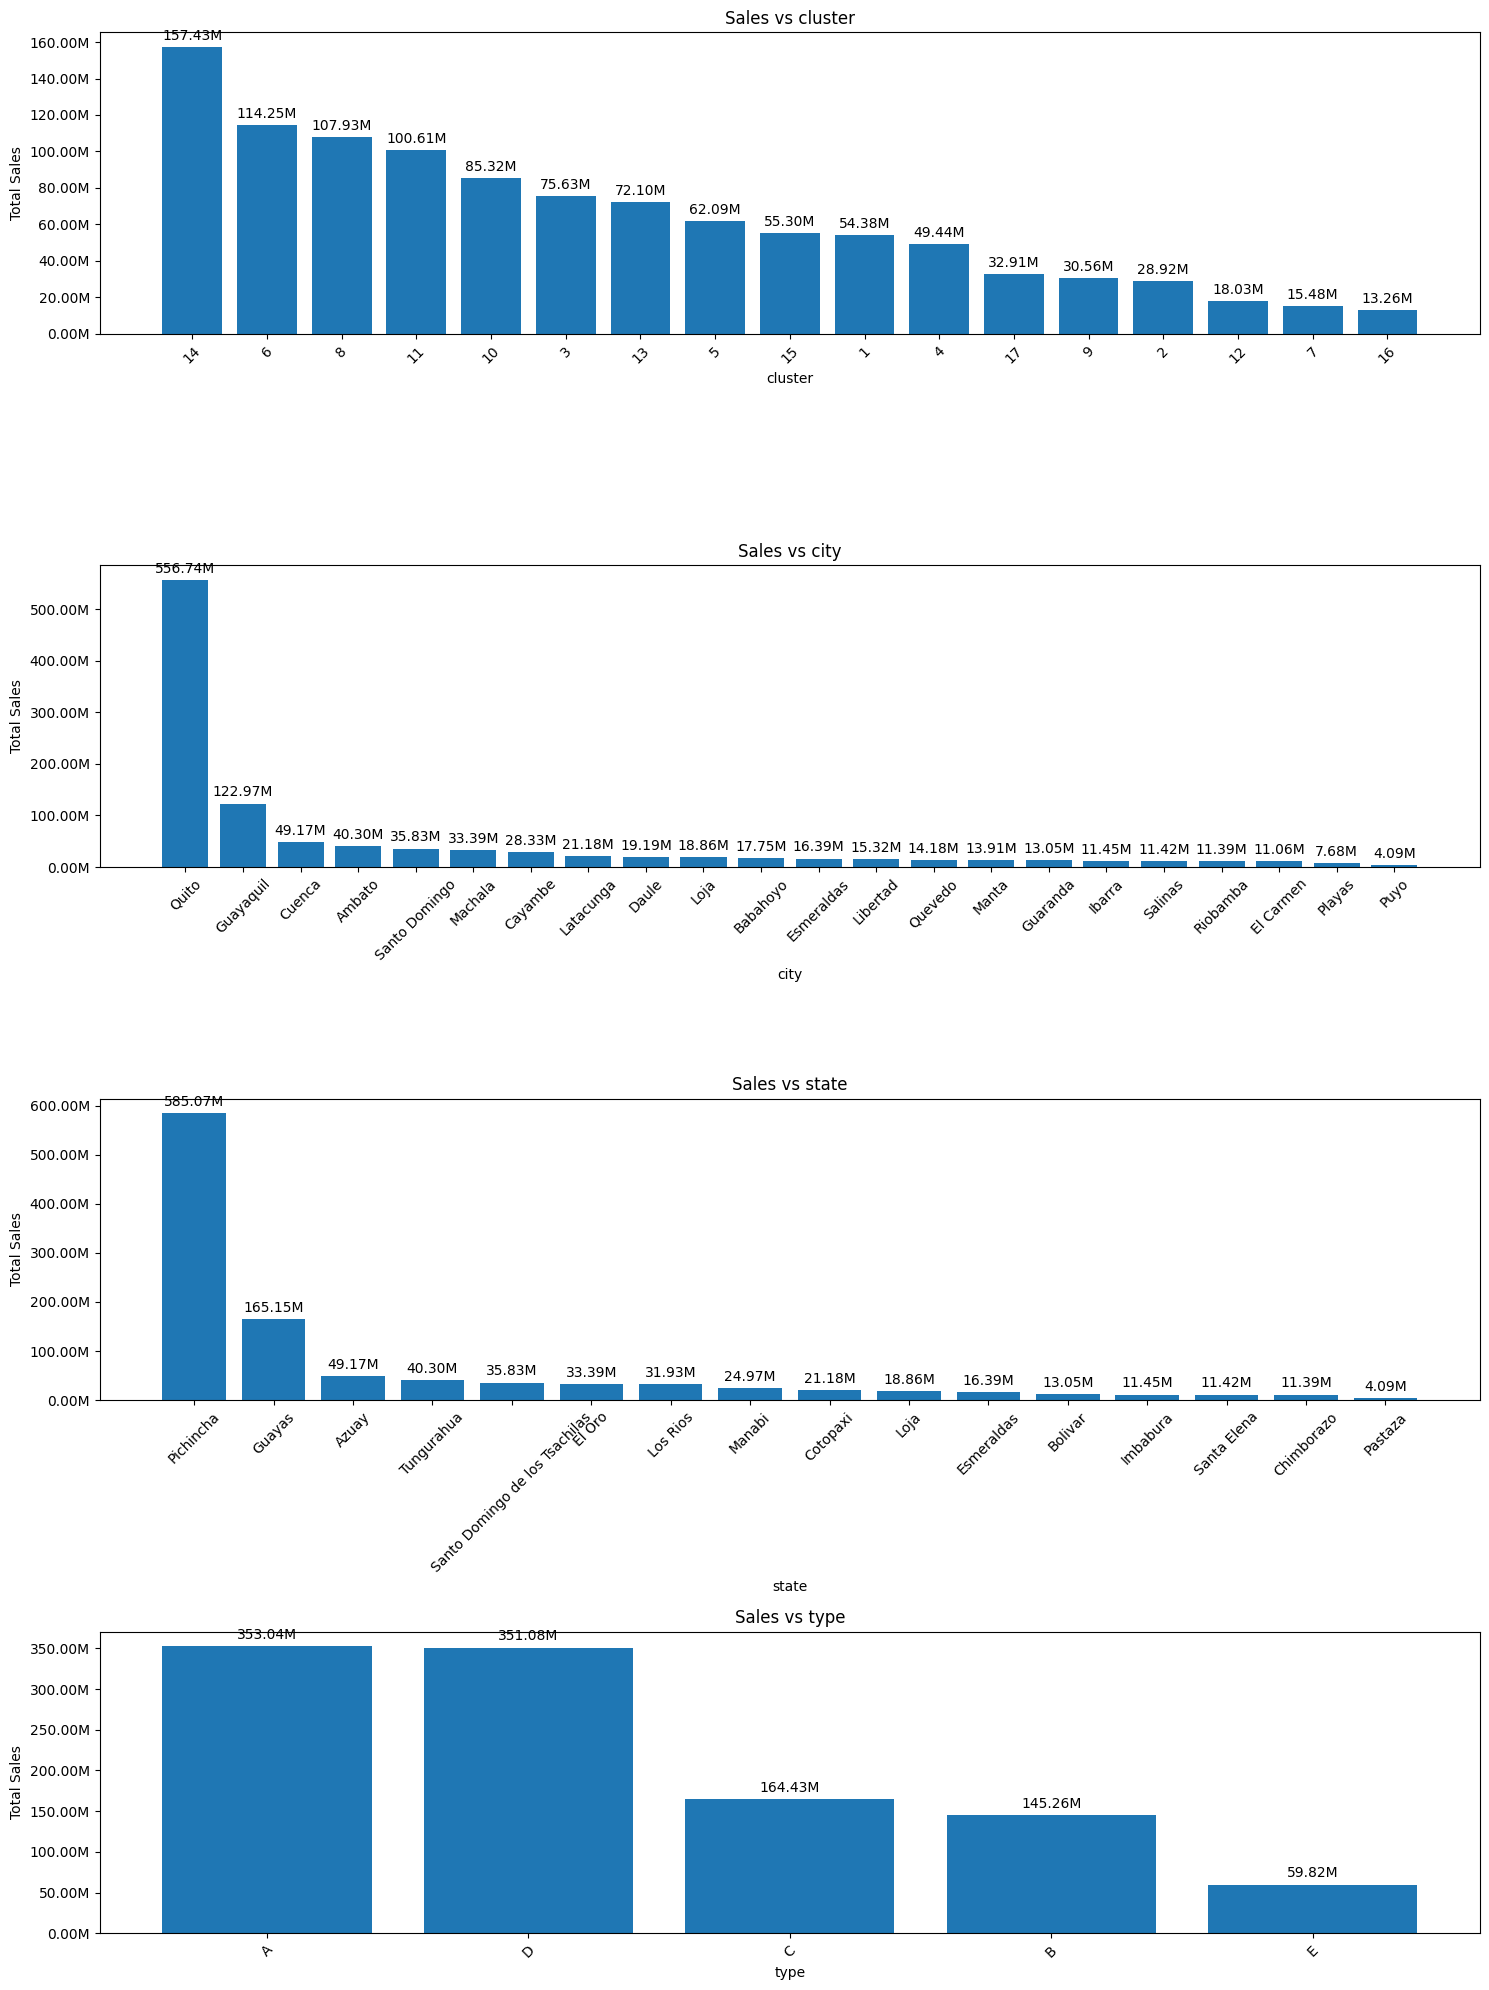

In [76]:
# Merge Store data to previous merged data on store_nbr column
train_store_df = train_dataset.join(store_dataset, on='store_nbr')

group_by_columns = ['cluster', 'city', 'state', 'type']

fig, axs = plt.subplots(len(group_by_columns), 1, figsize=(15, 5 * len(group_by_columns)))

def millions_formatter(x, pos):
    """Formatter function to display values in billions"""
    return f'{x/1e6:.2f}M'

for idx, column in enumerate(group_by_columns):
    grouped_sales = train_store_df.groupby(column).agg(pl.sum('sales').alias('total_sales')).sort('total_sales', descending=True)
    grouped_sales = grouped_sales.with_columns(pl.col(column).cast(pl.String))  # Casting the column to string
    
    # Plotting the visualization on its own subplot
    bars = axs[idx].bar(grouped_sales[column], grouped_sales['total_sales'])
    
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel('Total Sales')
    axs[idx].set_title(f'Sales vs {column}')
    axs[idx].tick_params(axis='x', rotation=45)
    
    # Add sales values on top of each bar
    for bar in bars:
        height = bar.get_height()
        axs[idx].annotate(f'{height/1e6:.2f}M', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                          textcoords='offset points', ha='center', va='bottom')

    # Format y-axis tick labels in billions
    axs[idx].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Key Insights**
            
*Clusters Performance:*
- Cluster 14: Leads with the highest sales at 157.43M, significantly outperforming other clusters.

- Cluster 6: Follows with 114.25M in sales.

- Cluster 8: Third highest with 107.93M.

*City Sales:*
- Quito: Dominates with the highest sales at 556.74M.

- Guayaquil: Second with 122.97M.

- Cuenca: Third with 49.17M.

*State Sales:*
- Pichincha: Highest sales at 585.07M.
    
- Guayas: Second with 165.15M.

- Other States: Azuay, Tungurahua, and others have much lower sales compared to Pichincha and Guayas.

*Store Types:*
- Type A: Highest sales at 353.04M.
    
- Type D: Close second with 351.08M.

- Type C: Noticeable drop in sales at 164.43M.

- Type B: Sales of 145.26M.
    
- Type E: Lowest sales at 59.82M.

**Conclusion:**

`Clusters`: Cluster 14's high sales point to potential best practices.

`Cities`: Quito's dominant sales suggest scalable strategies.

`States`: Pichincha's strong performance indicates opportunities for replication.

`Store Types`: Types A and D's success highlights market trends and effective sales tactics.


*Question 6. Are sales affected by promotions, oil prices and holidays?*

- Checking for missing dates in the oil data frame

In [77]:
# Calling start_end_date function on oil dataset
start_date, end_date = start_end_date(oil_dataset)

Start date is 2013-01-01
End date is 2017-08-31


In [78]:
# Calling the function for missing dates to check if there are missing dates in the oil dataset
all_missing_dates = missing_dates(oil_dataset)
all_missing_dates.head(2)

literal
date
2013-01-05
2013-01-06


In [79]:
# Creating a dataframe to store my missing values
missing_df = pl.DataFrame()
missing_df = missing_df.with_columns(
    date=all_missing_dates,
    dcoilwtico=None,
)

missing_df.glimpse()

Rows: 486
Columns: 2
$ date       <date> 2013-01-05, 2013-01-06, 2013-01-12, 2013-01-13, 2013-01-19, 2013-01-20, 2013-01-26, 2013-01-27, 2013-02-02, 2013-02-03
$ dcoilwtico <null> None, None, None, None, None, None, None, None, None, None



In [80]:
# Concating the original oil_dataset with missing_df
oil_dataset = oil_dataset.vstack(missing_df).sort('date')
oil_dataset.glimpse()

Rows: 1704
Columns: 2
$ date       <date> 2013-01-01, 2013-01-02, 2013-01-03, 2013-01-04, 2013-01-05, 2013-01-06, 2013-01-07, 2013-01-08, 2013-01-09, 2013-01-10
$ dcoilwtico  <f64> None, 93.13999938964844, 92.97000122070312, 93.12000274658203, None, None, 93.19999694824219, 93.20999908447266, 93.08000183105469, 93.80999755859375



In [81]:
#Checking again to confirm there are no more missing dates in the oil dataset by calling the missing dates function
all_missing_dates = missing_dates(oil_dataset)
all_missing_dates

literal
date


In [82]:
# Forward fill missing values in the 'dcoilwtico' column
oil_dataset = oil_dataset.fill_null(strategy="forward")

In [83]:
# Backward fill missing value in the 'dcoilwtico' column
oil_dataset = oil_dataset.fill_null(strategy="backward")

In [84]:
oil_dataset.null_count()

date,dcoilwtico
u32,u32
0,0


- Merging the oil_dataset and the Holiday_events_df with train_dataset

In [85]:
# Merge Holiday data to train data on date column
train_holiday_df = train_dataset.join(holiday_dataset, on='date')

# Merge Oil data to previous merged data on date column
train_holiday_oil_df = train_holiday_df.join(oil_dataset, on='date')

train_holiday_oil_df.head(1)

date,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter,type,locale,locale_name,description,transferred,dcoilwtico
date,i64,str,f64,i64,i32,i8,i8,i8,i8,str,str,str,str,bool,f64
2013-01-01,1,"""AUTOMOTIVE""",0.0,0,2013,1,1,2,1,"""Holiday""","""National""","""Ecuador""","""Primer dia del ano""",false,93.139999


- Oil prices Vs sales

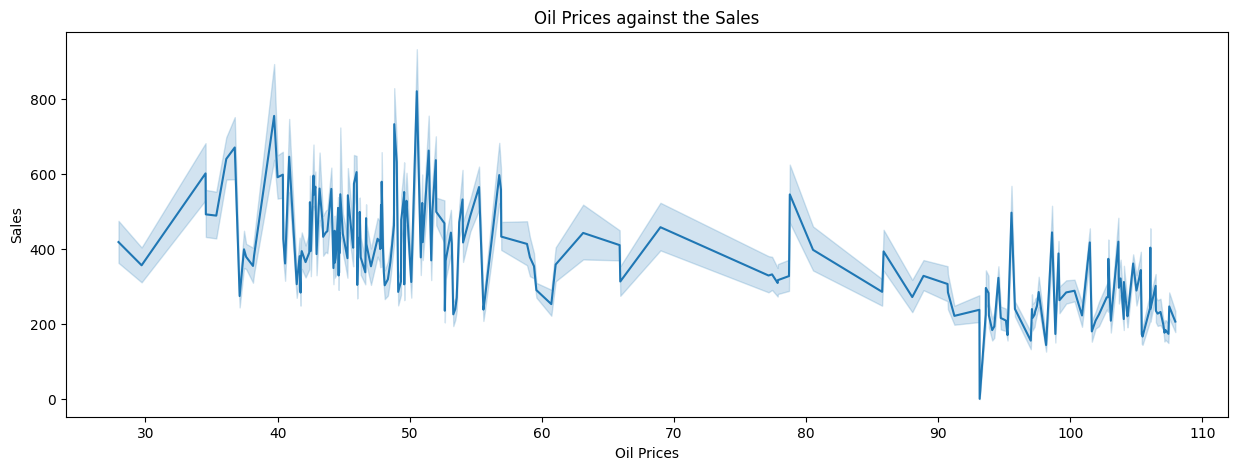

In [86]:
plt.figure(figsize = (15,5))

# Visualiza the data
sns.lineplot(data = train_holiday_oil_df, x='dcoilwtico', y='sales')
plt.title('Oil Prices against the Sales')
plt.xlabel('Oil Prices')
plt.ylabel('Sales')
plt.show()

- Holidays Vs sales

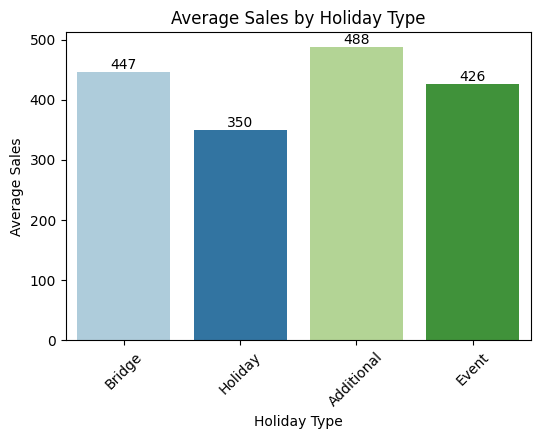

In [87]:
# Filter data for holidays (excluding transfers)
holiday_types = ['Holiday', 'Bridge', 'Additional', 'Event']
holiday_data = train_holiday_oil_df.filter(pl.col('type').is_in(holiday_types))

# Group data by holiday type and calculate average sales
avg_sales_by_type = holiday_data.groupby('type').agg(pl.mean('sales')).select('type', pl.col('sales').alias('sales_mean'))

# Convert Polars DataFrame to pandas DataFrame for plotting with Seaborn
avg_sales_by_type_df = avg_sales_by_type.to_pandas()


# Create the bar plot using Seaborn
plt.figure(figsize=(6,4))
ax = sns.barplot(x='type', y='sales_mean', data=avg_sales_by_type, palette='Paired')
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

- Promotions Vs Sales

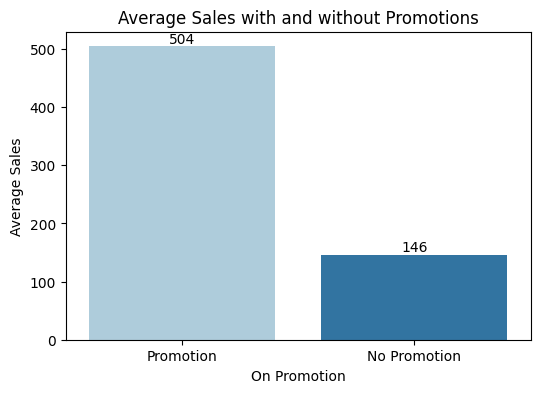

In [88]:
# Filter data for promotions and no promotions
promotions_data = train_holiday_oil_df.filter(train_holiday_oil_df['onpromotion'] == 1)['sales']
no_promotions_data = train_holiday_oil_df.filter(train_holiday_oil_df['onpromotion'] == 0)['sales']

# Create the line plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=['Promotion', 'No Promotion'], y=[promotions_data.mean(), no_promotions_data.mean()], palette='Paired')
plt.title('Average Sales with and without Promotions')
plt.xlabel('On Promotion')
plt.ylabel('Average Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

**Key Insights**

Oil Prices: Moderate oil prices encourage higher sales, but very high prices can reduce sales due to increased costs.
    
Holidays: 'Additional', 'Bridge', and 'Event' holidays are particularly effective for driving sales, unlike regular holidays.

Promotions: Promotions are a powerful tool for increasing sales, highlighting the importance of strategic promotional activities.

- Understanding these factors can help in planning and optimizing marketing, pricing, and inventory strategies to maximize sales throughout the year.

*Question 7. What analysis can we get from the date and its extractable features?*

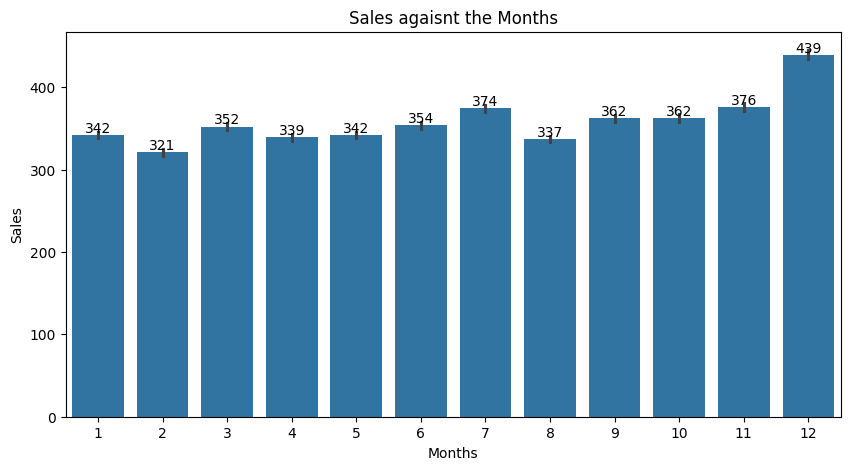

In [89]:
# Plotting the sales against the months
plt.figure(figsize = (10,5))
ax = sns.barplot(data = train_dataset, x='month', y='sales')
plt.title('Sales agaisnt the Months')
plt.xlabel('Months')
plt.ylabel('Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

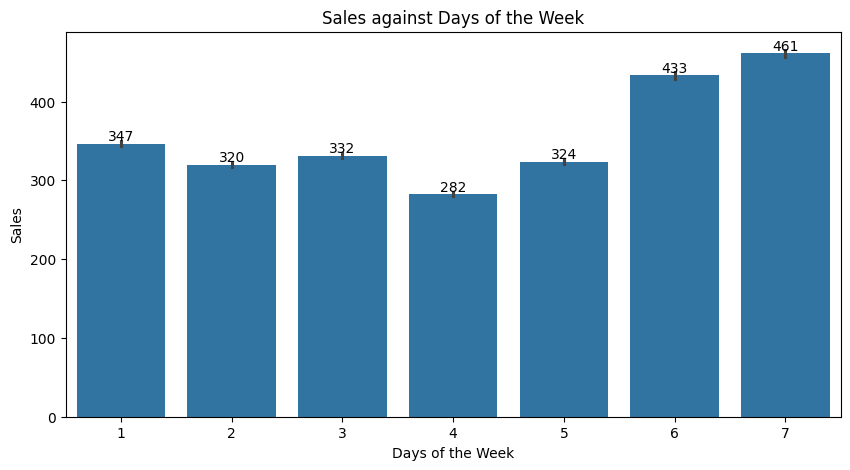

In [90]:
# Plotting the sales against the weekdays
plt.figure(figsize = (10,5))
ax = sns.barplot(data = train_dataset, x='weekday', y='sales')
plt.title('Sales against Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

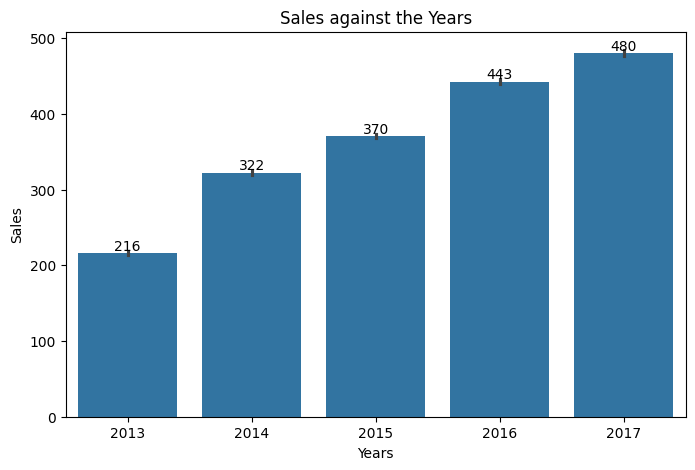

In [91]:
# Plotting the sales against the years
plt.figure(figsize = (8,5))
ax = sns.barplot(data = train_dataset, x='year', y='sales')
plt.title('Sales against the Years')
plt.xlabel('Years')
plt.ylabel('Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

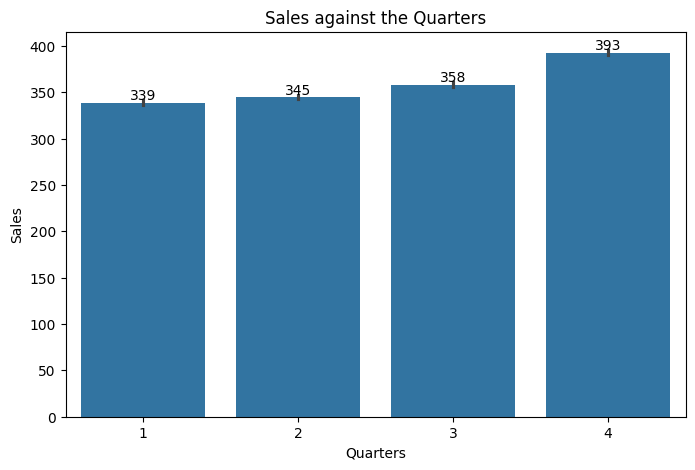

In [92]:
# Plotting the sales against the quarters
plt.figure(figsize = (8,5))
ax = sns.barplot(data = train_dataset, x='quarter', y='sales')
plt.title('Sales against the Quarters')
plt.xlabel('Quarters')
plt.ylabel('Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

**Key Insights**

*Monthly Trends:* Sales peak mid-year and at year-end, suggesting holiday and event-driven shopping patterns.

*Weekly Trends:* Higher weekend sales highlight the importance of weekend promotions and staffing adjustments.

*Yearly Trends:* Continuous growth from 2013 to 2017 indicates effective strategies and an expanding market.

*Quarterly Trends:* Highest sales in Q4 emphasize the need for strong end-of-year planning.

- Understanding these sales patterns helps in strategic decision-making for inventory management, marketing campaigns, staffing, and sales forecasting, ensuring better alignment with consumer behavior and market dynamics.

*Question 8. Which product family and stores did the promotions affect.*

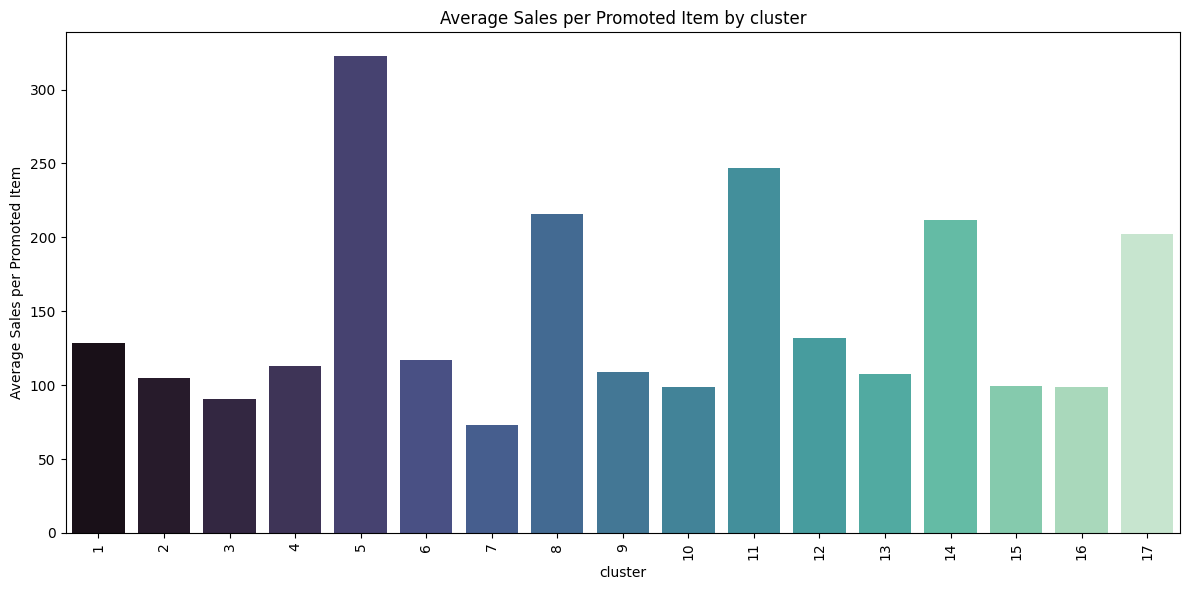

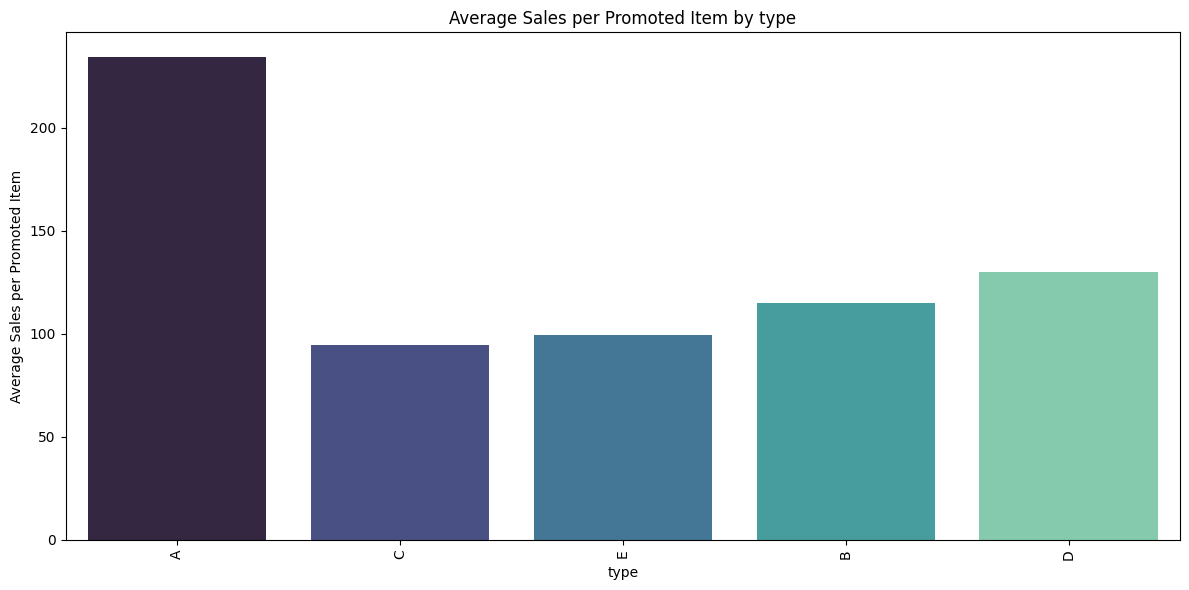

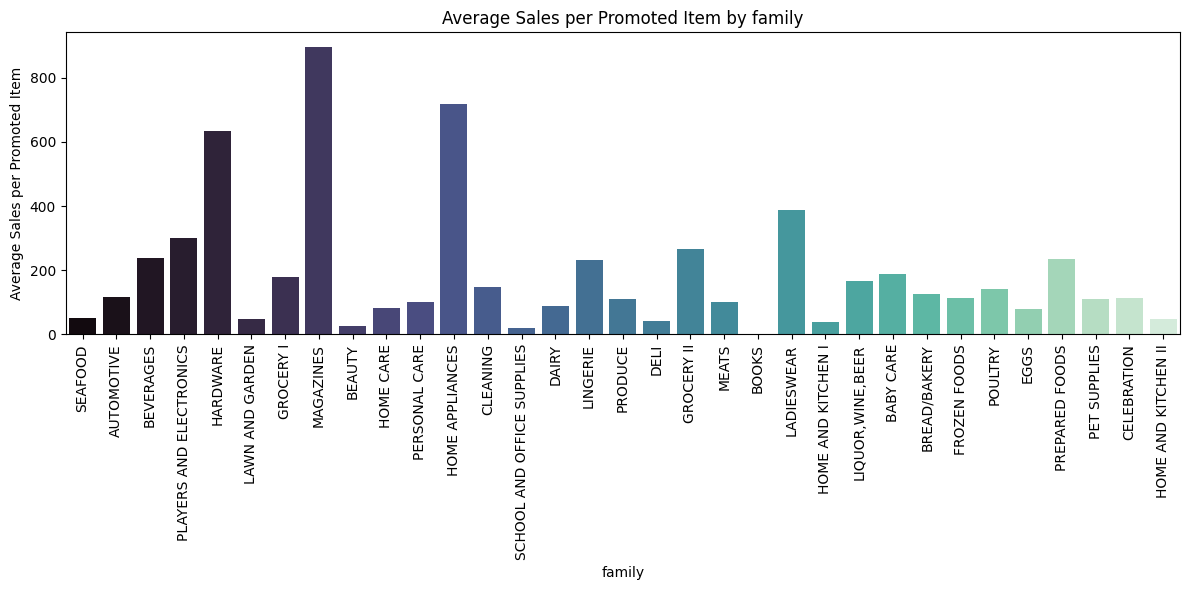

In [93]:
# Merge train_store_df with store_dataset
train_store_merged = train_store_df.join(store_dataset, on='store_nbr', how='left')

# Group data by the specified columns
group = ['cluster', 'type', 'family']
for g in group:
    # Group data and calculate average sales for each group
    grouped_data = train_store_merged.groupby(g).agg(
        pl.sum('sales').alias('total_sales'),
        pl.sum('onpromotion').alias('total_promoted_items')
    ).to_pandas()

    # Calculate average sales per promoted item
    grouped_data['avg_sales_per_promoted_item'] = grouped_data['total_sales'] / grouped_data['total_promoted_items']

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    sns.barplot(x=g, y='avg_sales_per_promoted_item', data=grouped_data, palette='mako')
    plt.xlabel(g)
    plt.ylabel('Average Sales per Promoted Item')
    plt.title(f'Average Sales per Promoted Item by {g}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Key Insights**

- Cluster Analysis: Promotions are most effective in certain clusters, especially Cluster 5.
    
- Item Type Analysis: Type A items show the highest sales increase per promotion, making them a key focus for promotional activities.

- Product Family Analysis: Magazines, Home Appliances, and Hardware respond strongly to promotions, while others like Players and Electronics may need different marketing approaches.

By understanding these patterns, retailers can optimize their promotional strategies, focusing on the clusters, item types, and product families that yield the highest sales increases. This targeted approach ensures that marketing efforts are both efficient and effective, driving overall sales growth.

*Question 9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?*


- `RMSLE (Root Mean Squared Logarithmic Error):` Useful when predicting sales with large ranges, penalizing underestimation more.

- `RMSE (Root Mean Squared Error):` Standard metric measuring the square root of the average squared differences between predicted and actual values, sensitive to outliers.

- `MSE (Mean Squared Error):` Similar to RMSE but without the square root, giving more weight to larger errors.

- `MAE (Mean Absolute Error):` Measures the average absolute difference between predicted and actual values, often larger due to being more robust to outliers compared to RMSE and MSE.

*Question 10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.*

In [94]:
# Group sales data by year, month and day
grouped_by_year_month_and_day = train_dataset.groupby(['year', 'month', 'day']).agg(pl.sum('sales'))

# Convert the grouped data to Pandas DataFrame
grouped_by_year_month_and_day_df = grouped_by_year_month_and_day.to_pandas()

# Calculate average sales on wage payment days (15th and last day of the month)
wage_days_sales = grouped_by_year_month_and_day_df[(grouped_by_year_month_and_day_df['day'] == 15) | (grouped_by_year_month_and_day_df['day'] == grouped_by_year_month_and_day_df['day'].max())]
average_sales_on_wage_days = wage_days_sales['sales'].mean()

# Calculate average sales on other days
other_days_sales = grouped_by_year_month_and_day_df[(grouped_by_year_month_and_day_df['day'] != 15) & (grouped_by_year_month_and_day_df['day'] != grouped_by_year_month_and_day_df['day'].max())]
average_sales_on_other_days = other_days_sales['sales'].mean()

# Compare the averages
if average_sales_on_wage_days > average_sales_on_other_days:
    print("Sales are higher on wage payment days.")
else:
    print("Sales are not significantly different on wage payment days.")


Sales are higher on wage payment days.


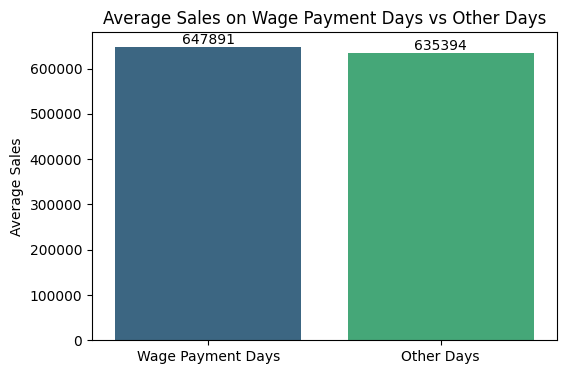

In [95]:
# Calculate average sales on wage payment days (15th and last day of the month)
wage_days_sales = grouped_by_year_month_and_day_df[(grouped_by_year_month_and_day_df['day'] == 15) | (grouped_by_year_month_and_day_df['day'] == grouped_by_year_month_and_day_df['day'].max())]
average_sales_on_wage_days = wage_days_sales['sales'].mean()

# Calculate average sales on other days
other_days_sales = grouped_by_year_month_and_day_df[(grouped_by_year_month_and_day_df['day'] != 15) & (grouped_by_year_month_and_day_df['day'] != grouped_by_year_month_and_day_df['day'].max())]
average_sales_on_other_days = other_days_sales['sales'].mean()

# Create a DataFrame for plotting
data = {
    'Day Type': ['Wage Payment Days', 'Other Days'],
    'Average Sales': [average_sales_on_wage_days, average_sales_on_other_days]
}
sales_df = pd.DataFrame(data)

# Create the bar plot using Seaborn
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Day Type', y='Average Sales', data=sales_df, palette='viridis')
plt.title('Average Sales on Wage Payment Days vs Other Days')
plt.xlabel('')
plt.ylabel('Average Sales')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')
plt.show()

**Key Insights**

- Consumer Behavior: The increase in sales on wage payment days indicates that consumers tend to spend more when they have newly received their wages.

- Strategic Planning: Retailers can use this insight to plan special promotions or stock up on popular items around these dates to maximize sales.

By understanding the influence of wage payment days on sales, retailers can better align their inventory and marketing strategies to capitalize on periods of increased consumer spending.

#### `Hypothesis Testing`
`Null Hypothesis (Ho):` Holidays do not have a significant effect on the sales
 
`Alternate Hypothesis (Ha):` Holidays have a significant effect on the sales

We will use Mann-Whiteny to test to the Hypothesis because our sales has a high positive skweness and the distribution is not normal


In [96]:
train_holiday_oil_df.head(3)

date,store_nbr,family,sales,onpromotion,year,month,day,weekday,quarter,type,locale,locale_name,description,transferred,dcoilwtico
date,i64,str,f64,i64,i32,i8,i8,i8,i8,str,str,str,str,bool,f64
2013-01-01,1,"""AUTOMOTIVE""",0.0,0,2013,1,1,2,1,"""Holiday""","""National""","""Ecuador""","""Primer dia del ano""",false,93.139999
2013-01-01,1,"""BABY CARE""",0.0,0,2013,1,1,2,1,"""Holiday""","""National""","""Ecuador""","""Primer dia del ano""",false,93.139999
2013-01-01,1,"""BEAUTY""",0.0,0,2013,1,1,2,1,"""Holiday""","""National""","""Ecuador""","""Primer dia del ano""",false,93.139999


In [97]:
# Filter data for holidays (excluding transfers)
holiday_types = ['Holiday', 'Bridge', 'Additional', 'Event']
 
mask = pl.col('type').is_in(holiday_types)
 
with_holidays = train_holiday_oil_df.filter(mask)['sales']
 
without_holidays =  train_holiday_oil_df.filter(~mask)['sales']

In [98]:
# Perform Mann-Whitney U test to compare sales before and after the earthquake
u_stat, p_value = mannwhitneyu(with_holidays, without_holidays, alternative='two-sided')

# Significance level
alpha = 0.05

print("Mann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significance level (α): {alpha:.4f}")

if p_value < alpha:
    print("\nConclusion:")
    print("Reject the Null Hypothesis. The data suggests that holidays do not have a significant effect on the sales.")
else:
    print("\nConclusion:")
    print("Fail to reject the Null Hypothesis. The data suggests that holidays have a significant effect on the sales.")

Mann-Whitney U Test Results:
U-statistic: 5700825191.0000
p-value: 0.0000
Significance level (α): 0.0500

Conclusion:
Reject the Null Hypothesis. The data suggests that holidays do not have a significant effect on the sales.


#### `Data Preparation`

Statistical Models

Using Differencing to make the data stationary

In [99]:
# train_dataset['sales'] - train_dataset['sales'].shift(1)
diff_df = train_dataset.with_columns((pl.col('sales')-pl.col('sales').shift(1)).alias('sales_diff'))

In [100]:
diff_df = diff_df.group_by('date').agg(pl.col('sales').sum(), pl.col('sales_diff').sum())

In [101]:
# Resampling the data to weekly and getting the average
resampled_df = diff_df.group_by_dynamic("date", every="1w").agg(pl.col("sales_diff").mean())

resampled_df.shape

(242, 2)

In [102]:
# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(resampled_df['sales_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform differencing if needed for stationarity
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -11.118451839297938
p-value: 3.514685411916923e-20
Data is stationary


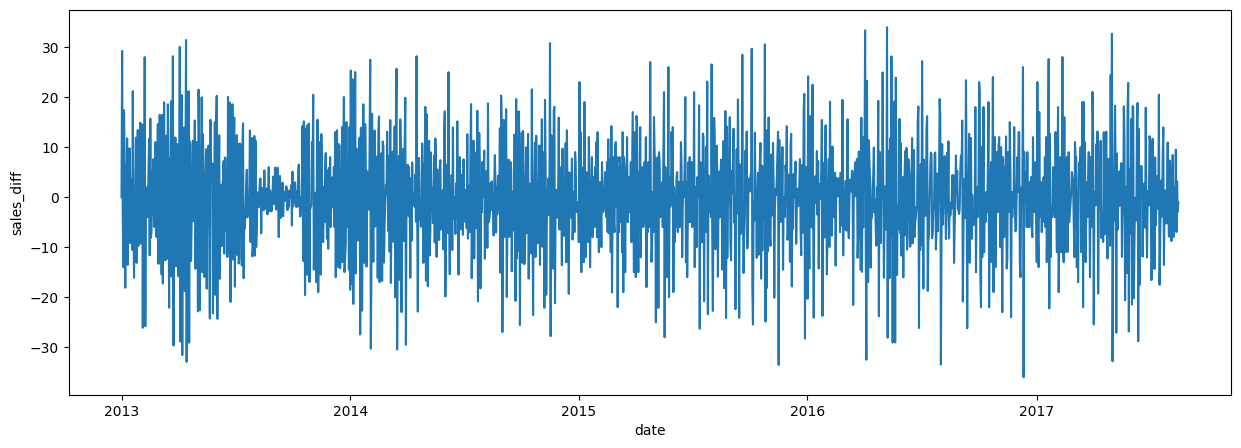

In [103]:
plt.figure(figsize = (15,5))
sns.lineplot(data = diff_df, x='date', y='sales_diff')
plt.show()

In [104]:
diff_df.head(2)

date,sales,sales_diff
date,f64,f64
2013-01-01,2511.618999,0.0
2013-01-02,496092.417944,29.214


#### `Modeling and Evaluation`

Modeling for Statistical Models
- SARIMA
- ARIMA
- Prophet

Train and test

In [105]:
horizon = pl.date(2017,7,15)

# Filter data for modeling
train = diff_df.filter(pl.col('date') < horizon)

test = diff_df.filter(pl.col('date') >= horizon)

Define parameters for stat models

In [106]:
# Remove transferred and work days from holiday_events_df
mask_transfer = pl.col('transferred') == False
mask_work =  pl.col('type') != 'Work Day'
holiday_df = holiday_dataset.filter(mask_transfer & mask_work)
holiday_df.glimpse()

Rows: 333
Columns: 6
$ date        <date> 2012-03-02, 2012-04-01, 2012-04-12, 2012-04-14, 2012-04-21, 2012-05-12, 2012-06-23, 2012-06-25, 2012-06-25, 2012-06-25
$ type         <str> 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday', 'Holiday'
$ locale       <str> 'Local', 'Regional', 'Local', 'Local', 'Local', 'Local', 'Local', 'Regional', 'Local', 'Local'
$ locale_name  <str> 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Latacunga', 'Machala'
$ description  <str> 'Fundacion de Manta', 'Provincializacion de Cotopaxi', 'Fundacion de Cuenca', 'Cantonizacion de Libertad', 'Cantonizacion de Riobamba', 'Cantonizacion del Puyo', 'Cantonizacion de Guaranda', 'Provincializacion de Imbabura', 'Cantonizacion de Latacunga', 'Fundacion de Machala'
$ transferred <bool> False, False, False, False, False, False, False, False, False, False



- Create the holidays df for prophet model

In [107]:
holidays = pl.DataFrame(
    {
        'ds': holiday_df['date'].unique(),
        'holiday': 'Holiday',
    }
)
holidays = holidays.to_pandas()

In [108]:
# Define the SARIMA order and seasonal order
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 7)

# Define the ARIMA order
arima_order = (1, 1, 1)

# Define the Prophet model parameters
prophet_params = {
    'changepoint_prior_scale': 0.1,
    'seasonality_prior_scale': 10,
}    

Convert to pandas dataframe for modeling and ploting

In [109]:
train = train.to_pandas().set_index('date').drop(columns='sales_diff')
test = test.to_pandas().set_index('date').drop(columns='sales_diff')

In [110]:
# Initialize lists to store evaluation metrics and forecast results
models = ['SARIMA', 'ARIMA', 'Prophet']
# Creating dictionary for the trained models
all_stat_models = {}
forecast_data = {'SARIMA': None, 'ARIMA': None, 'Prophet': None}
mae_results = []
mse_results = []
rmse_results = []
rmsle_results = []

for model_name in models:
    print(f'Training {model_name}...')
    
    if model_name == 'SARIMA':
        model = SARIMAX(train['sales'], order=sarima_order, seasonal_order=sarima_seasonal_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test))
    elif model_name == 'ARIMA':
        model = ARIMA(train['sales'], order=arima_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test))
    else:  # Prophet
        prophet_train = train.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
        prophet_test = test.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
        prophet_model = Prophet(**prophet_params, holidays=holidays)
        model_fit = prophet_model.fit(prophet_train)
        prophet_forecast_data = model_fit.predict(prophet_test)
        forecast = prophet_forecast_data['yhat'].values 
               
    # Store the sales forecast
    forecast_data[model_name] = forecast
    
    # Store the trained model 
    all_stat_models[model_name] = model_fit
    
    # Calculate metrics     
    mae = mean_absolute_error(test['sales'], forecast)
    mse = mean_squared_error(test['sales'], forecast)
    rmse = root_mean_squared_error(test['sales'], forecast)
    rmsle = root_mean_squared_log_error(test['sales'], forecast) 
 
    # rmsle_results.append(rmsle)
    mae_results.append(mae)
    mse_results.append(mse)
    rmse_results.append(rmse)
    rmsle_results.append(rmsle)
    
# Display evaluation results
eval_results = pd.DataFrame({
    'MODEL_NAME': models,        
    'MAE': mae_results,
    'MSE': mse_results,
    'RMSE': rmse_results,
    'RMSLE': rmsle_results,
})
print('\nEvaluation Results:')
eval_results

Training SARIMA...
Training ARIMA...
Training Prophet...


09:30:25 - cmdstanpy - INFO - Chain [1] start processing
09:30:27 - cmdstanpy - INFO - Chain [1] done processing



Evaluation Results:


,MODEL_NAME,MAE,MSE,RMSE,RMSLE
0,SARIMA,57429.299901,6.887136e+09,82988.772387,0.093455
1,ARIMA,111904.551845,1.726399e+10,131392.505449,0.152400
2,Prophet,120330.171489,1.834039e+10,135426.706195,0.159494


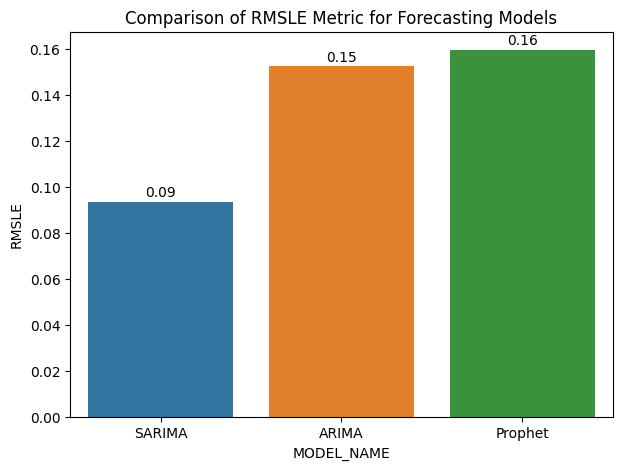

In [111]:
plt.figure(figsize=(7, 5)) 

sns.barplot(x='MODEL_NAME', y='RMSLE', data=eval_results, hue='MODEL_NAME')

plt.title('Comparison of RMSLE Metric for Forecasting Models')

# Adding annotations
for index, value in enumerate(eval_results['RMSLE']):
    plt.text(index, value + 0.001, (f'{value:.2f}'), ha='center', va='bottom')
    
plt.ylabel('RMSLE')
plt.xlabel('MODEL_NAME')
# plt.ylim(0.3, 0.4)  # Comparism for obvious
plt.show()

1. **SARIMA Model:**
   - **MAE:** The SARIMA model exhibits a MAE of approximately $57,429.31. This metric indicates the average absolute difference between the predicted and actual sales values, reflecting the model's accuracy in forecasting.
   - **RMSE:** With an RMSE of around $82,988.77, the SARIMA model measures the average magnitude of error between predicted and observed values, emphasizing the model's ability to capture deviations from actual sales data.
   - **RMSLE:** The SARIMA model achieves an RMSLE of 0.09, highlighting the relative error between predicted and actual sales values on a logarithmic scale. A lower RMSLE suggests better accuracy in predicting sales trends.

2. **ARIMA Model:**
   - **MAE:** The ARIMA model yields a MAE of approximately $111,904.55, indicating a higher average error in predicting sales for Corporation Favorita compared to the SARIMA model.
   - **RMSE:** With an RMSE of around $131,392.51, the ARIMA model demonstrates a larger magnitude of error, suggesting less accuracy in capturing sales fluctuations compared to the SARIMA model.
   - **RMSLE:** The ARIMA model achieves an RMSLE of 0.15, indicating a higher relative error compared to the SARIMA model, which signifies less accuracy in sales prediction on a logarithmic scale.

3. **Prophet Model:**
   - **MAE:** The Prophet model records the highest MAE of approximately $121,510.38, suggesting it has the highest average error in predicting sales among the three models.
   - **RMSE:** With an RMSE of around $136,012.85, the Prophet model shows the largest error in capturing sales variations, indicating it is the least effective at predicting precise sales values.
   - **RMSLE:** The Prophet model achieves an RMSLE of 0.16, which is the highest among the three models, suggesting it has the least accurate prediction of sales trends on a logarithmic scale.

**Conclusion:**
The evaluation results indicate that the SARIMA model outperforms both the ARIMA and Prophet models in predicting sales for Corporation Favorita based on all three metrics—MAE, RMSE, and RMSLE.

**Recommendations:**
1. **Adoption of SARIMA Model:**
   - Incorporate the SARIMA model into Corporation Favorita's forecasting framework to enhance the accuracy and reliability of sales predictions.

2. **Continuous Monitoring and Refinement:**
   - Regularly monitor model performance and refine forecasting methodologies to adapt to evolving market dynamics and consumer behavior.

3. **Exploration of Hybrid Models:**
   - Consider exploring hybrid models that combine the strengths of SARIMA, ARIMA, and Prophet models to further improve forecasting accuracy.

*Recommendations:*

- `Adoption of Prophet Model:`
Incorporate the Prophet model into Corporation Favorita's forecasting framework to enhance the accuracy and reliability of sales predictions.

- `Continuous Monitoring and Refinement:`
Regularly monitor model performance and refine forecasting methodologies to adapt to evolving market dynamics and consumer behavior.

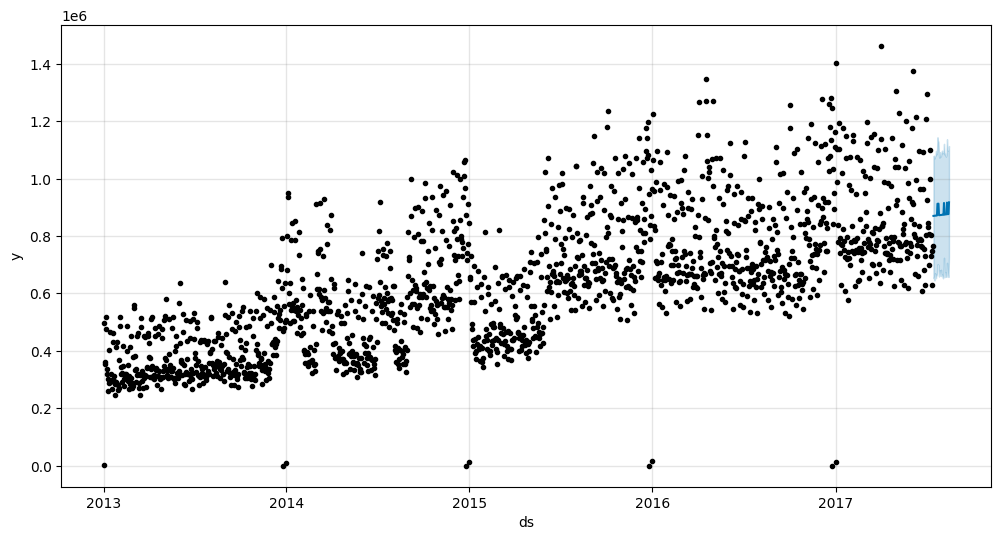

In [112]:
f, ax = plt.subplots(figsize=(12, 6))
fig = prophet_model.plot(prophet_forecast_data, ax=ax)
plt.show()

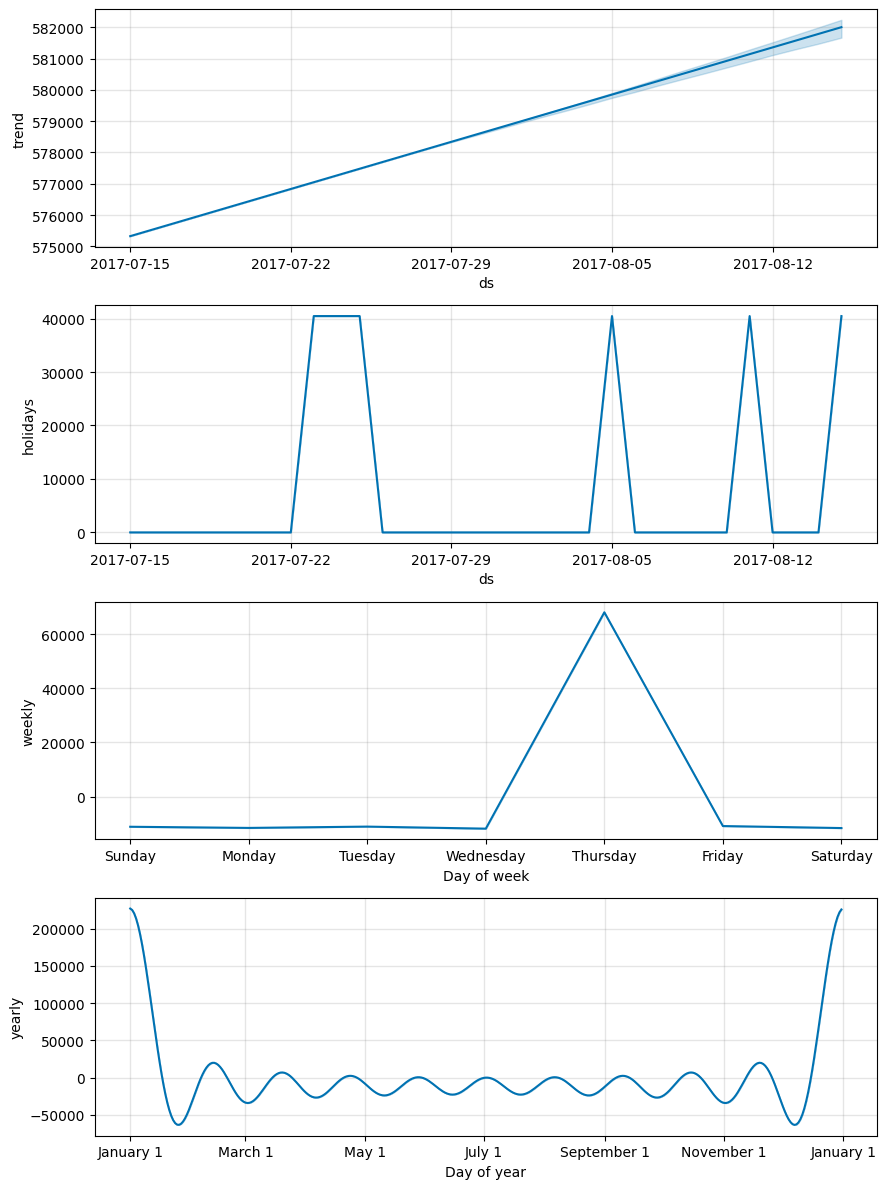

In [113]:
fig = prophet_model.plot_components(prophet_forecast_data)
plt.show()

In [114]:
data = {
    'arima_sales': forecast_data.get('ARIMA'),
    'sarima_sales': forecast_data.get('SARIMA'),
    'prophet_sales': forecast_data.get('Prophet'),
        
}

forecast_df = pd.DataFrame(data=data, index=test.index)
forecast_df

,arima_sales,sarima_sales,prophet_sales
date,,,
2017-07-15,816798.498278,1.002238e+06,870290.441681
2017-07-16,836623.583419,1.071656e+06,870505.929829
2017-07-17,844283.738817,8.170362e+05,870721.417977
2017-07-18,847243.523367,7.571025e+05,870936.906125
2017-07-19,848387.145674,7.906888e+05,871152.394273
2017-07-20,848829.026479,6.676630e+05,871367.882421
2017-07-21,848999.763483,7.889805e+05,871583.370569
2017-07-22,849065.734044,1.017445e+06,871798.858717
2017-07-23,849091.224211,1.069860e+06,912476.372772


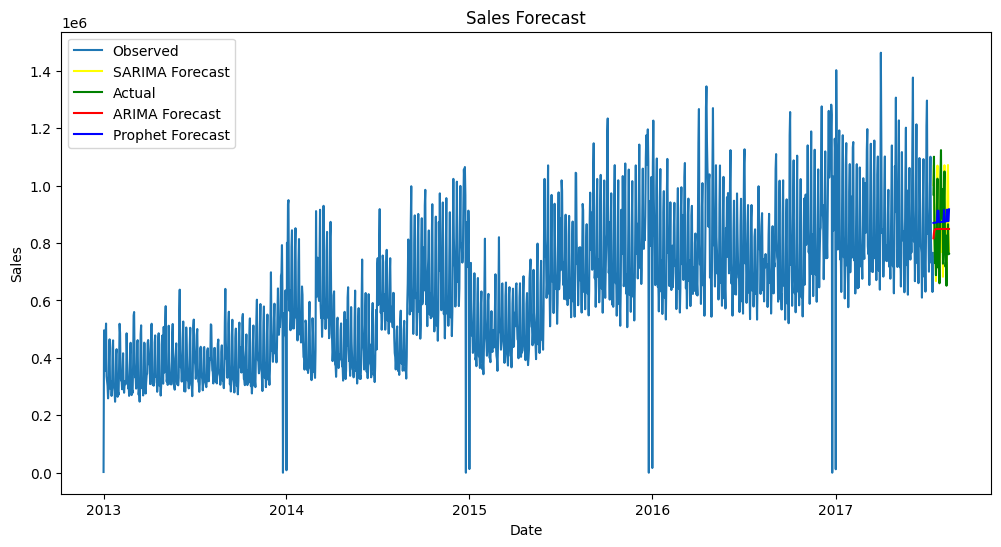

In [115]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Observed')
plt.plot(forecast_df['sarima_sales'], label='SARIMA Forecast', color='yellow')
plt.plot(test, label='Actual', color='green')
plt.plot(forecast_df['arima_sales'], label='ARIMA Forecast', color='red')
plt.plot(forecast_df['prophet_sales'], label='Prophet Forecast', color='blue')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

**Key Insights**

- SARIMA Performance:
        SARIMA demonstrates the best performance, with the lowest error metrics (MAE, MSE, RMSE, RMSLE) and the closest alignment with actual sales data.
        The visual plot confirms SARIMA’s superior performance, as it closely follows the trend and fluctuations of the actual sales.

- ARIMA Performance:
        ARIMA performs reasonably well but with higher error metrics compared to SARIMA.
        The forecast does not capture some of the variability in the actual sales data, leading to deviations in certain periods.

- Prophet Performance:
        Prophet has the highest error metrics and the most noticeable deviations from the actual sales data.
        The model may require further tuning or may not be as suitable for this particular sales data due to its inherent characteristics.

#### Visualize the forecast vs actuals
- All stat models

In [116]:

lower = test.index.min()

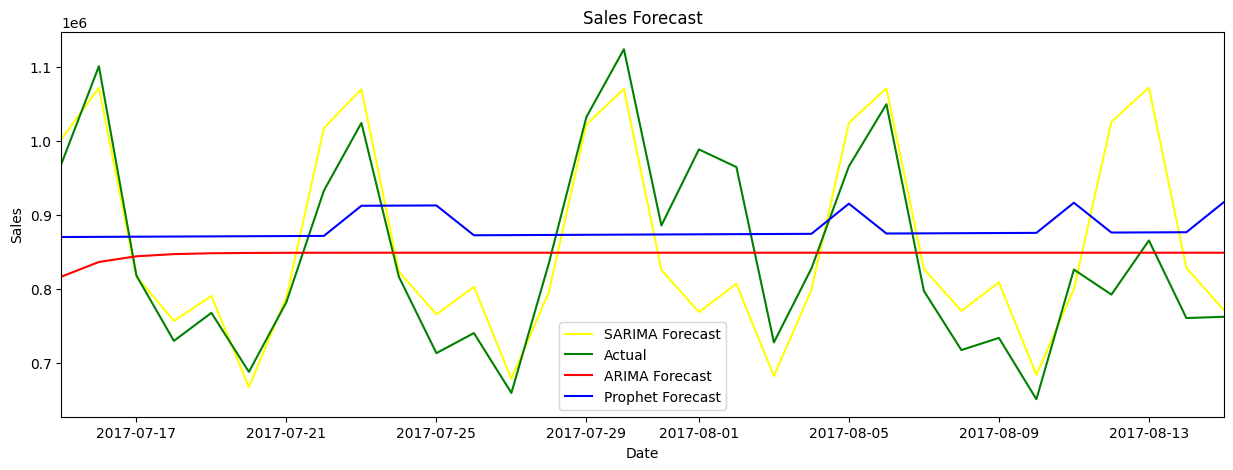

In [117]:
# Plot the forecast
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(forecast_df['sarima_sales'], label='SARIMA Forecast', color='yellow')
ax.plot(test, label='Actual', color='green')
ax.plot(forecast_df['arima_sales'], label='ARIMA Forecast', color='red')
ax.plot(forecast_df['prophet_sales'], label='Prophet Forecast', color='blue')
ax.set_xbound(lower=lower, upper=lower + DateOffset(months=1))
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

**Key Insights**

Model Performance:

- SARIMA stands out as the best-performing model in terms of accurately predicting sales. Its ability to closely follow the actual sales trend makes it highly suitable for forecasting in this context.
    
- ARIMA provides a reasonable forecast but lacks the capability to predict short-term variations, resulting in a more generalized trend line.

- Prophet shows the least alignment with actual sales, indicating potential issues with capturing the inherent patterns in the sales data.

- The Prophet model

In [118]:
pd.to_datetime('2017-1-1').date()

datetime.date(2017, 1, 1)

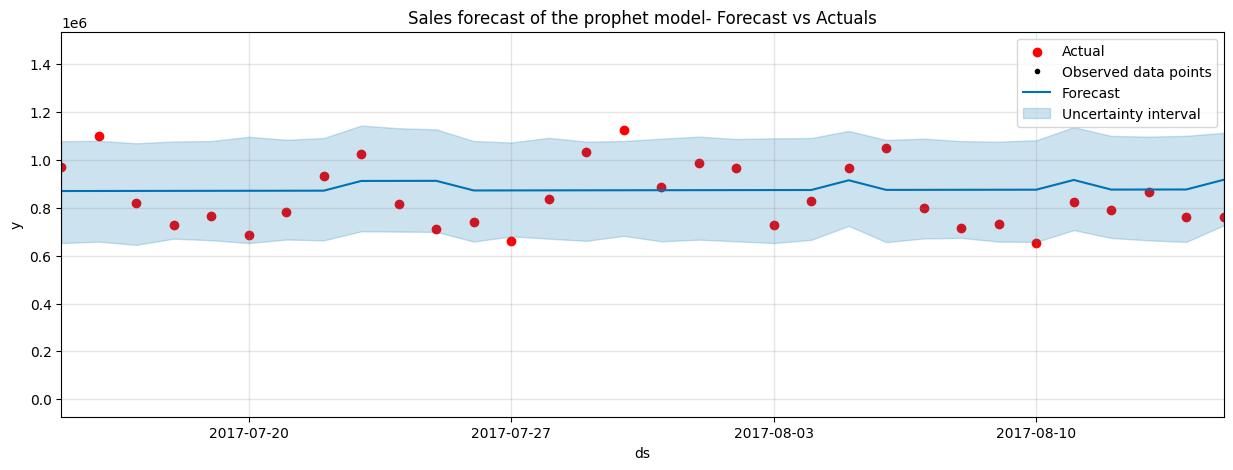

In [119]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['sales'], color='r', label='Actual')
fig = prophet_model.plot(prophet_forecast_data, ax=ax)
ax.set_xbound(lower=pd.to_datetime('2017-7-15').date(), upper=test.index.max().date())
ax.set_title('Sales forecast of the prophet model- Forecast vs Actuals')
plt.legend()
plt.show()

**Key Insights**

- Model Performance:
    
    Flat Predictions: The Prophet model forecasts a largely flat trend, which does not reflect the actual sales dynamics. This suggests that the model is not effectively capturing the seasonality and trends present in the sales data.
    
    Uncertainty: The wide uncertainty interval indicates a high level of uncertainty in the predictions. The actual sales data frequently falling outside this interval further underscores the model's limitations in this scenario.

- Forecast Accuracy:
    
    The poor alignment of the Prophet model's forecast with actual sales data suggests it is less suitable for this particular dataset compared to other models like SARIMA.
        
    The flat prediction and the misalignment with actual sales indicate that the Prophet model requires further tuning or might not be the best choice for this type of sales data.

#### Machine learning models

Original train dataset

In [120]:
train_dataset = train_dataset[train_col_org]

#### Split into X and y

In [121]:
train_dataset.columns

['date', 'store_nbr', 'family', 'sales', 'onpromotion']

In [122]:
X = train_dataset.to_pandas().drop('sales',axis = 1)

y = train_dataset.to_pandas()[['date', 'sales']]

In [123]:
feature_columns = X.columns
feature_columns

Index(['date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

In [124]:
horizon = pl.date(2017,7,15)

# Filter data for modeling
train = diff_df.filter(pl.col('date') < horizon)

test = diff_df.filter(pl.col('date') >= horizon)

In [125]:
horizon = pd.to_datetime('2017-07-15')
horizon

Timestamp('2017-07-15 00:00:00')

In [126]:
# Train
X_train = X [X['date'] < horizon]
y_train = y [y['date'] < horizon]

In [127]:
y_train = y_train.drop(columns='date')


In [128]:
# Evaluation
X_eval = X[X['date'] >= horizon]
y_eval = y[y['date'] >= horizon]

In [129]:
y_eval = y_eval.drop(columns='date')

#### Create new features

In [130]:
def fix_col_types(X):
    X['store_nbr'] = X['store_nbr'].astype('object')
    X['family'] = X['family'].astype('object')
        
    return X

In [131]:
def create_promotion_feature(X):
    X['promotion'] = X['onpromotion'].apply(lambda x: 'Yes' if x>0 else 'No')
    
    return X.drop(columns='onpromotion')

In [132]:
def create_date_features(X):
    X['date'] = pd.to_datetime(X['date'])
    # Year
    X['year'] = X.date.dt.year       
    X['is_year_start']= X.date.dt.is_year_start.astype(int)
    # Quarter
    X['quarter']= X.date.dt.quarter
    X['is_quarter_start']= X.date.dt.is_quarter_start.astype(int)
    X['is_quarter_end']= X.date.dt.is_quarter_end.astype(int)
    # Month
    X['month'] = X.date.dt.month    
    X['is_month_start']= X.date.dt.is_month_start.astype(int)
    X['is_month_end']= X.date.dt.is_month_end.astype(int) 
    # Week  
    X['week_of_year'] = X.date.dt.isocalendar().week    
    X['is_weekend']= np.where(X.date.dt.dayofweek > 4, 1, 0)
    # Day
    X['day_of_year'] = X.date.dt.dayofyear 
    X['day_of_month'] = X.date.dt.day 
    X['day_of_week'] = X.date.dt.dayofweek   
               
    return X.drop(columns='date')

##### Column names

In [133]:
# Date column
date_column = X.select_dtypes('datetime').columns

# Getting the categorical columns. Do categorical before numerical
categorical_columns = ['store_nbr', 'family', 'onpromotion']

# Getting the numerical columns
numerical_columns = ['date', 'onpromotion']

In [134]:
numerical_pipeline = Pipeline(steps=[
    ('date_features', FunctionTransformer(func=create_date_features)),
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),    
    ('num_scaler', RobustScaler())
])
 
# Define categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('fix_col_types', FunctionTransformer(func=fix_col_types)),
    ('promotion_features', FunctionTransformer(func=create_promotion_feature)),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),        
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])
 
# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers=[  
    ('cat', categorical_pipeline, categorical_columns),     
    ('num', numerical_pipeline, numerical_columns),       
])

In [135]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_eval_processed = preprocessor.transform(X_eval)


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Tamminga Budds\Documents\GitHub\Time-Series-Regression-Analysis\venv\Scripts\python.exe -m pip install --upgrade pip' command.


#### Train the models

- Linear Regression
- XGBoostRegressor

In [137]:
X_train

,date,store_nbr,family,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0
1,2013-01-01,1,BABY CARE,0
2,2013-01-01,1,BEAUTY,0
3,2013-01-01,1,BEVERAGES,0
4,2013-01-01,1,BOOKS,0
...,...,...,...,...
2950987,2017-07-14,9,POULTRY,21
2950988,2017-07-14,9,PREPARED FOODS,2
2950989,2017-07-14,9,PRODUCE,16
2950990,2017-07-14,9,SCHOOL AND OFFICE SUPPLIES,0


In [138]:
random_state = 42
n_jobs = -1
verbose = 0

models =[
    ('LinearRegression', LinearRegression(n_jobs=n_jobs)),
    ('XGBRegressor', XGBRegressor(n_estimators=100, random_state=random_state, verbose=verbose)),
]

# Creating dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['MODEL_NAME', 'MAE', 'MSE', 'RMSE', 'RMSLE'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_eval)

    # Calculate metrics
    mae = mean_absolute_error(y_eval, y_pred)
    mse = mean_squared_error(y_eval, y_pred)
    rmse = root_mean_squared_error(y_eval, y_pred)
    
    # Apply the absolute value function to the y_pred
    y_pred_abs = abs(y_pred)

    # Calculate the Root Mean Squared Logarithmic Error (RMSLE)
    rmsle = root_mean_squared_log_error(y_eval, y_pred_abs)

    # Add all pipelines into all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline

    # Add metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, mae, mse, rmse, rmsle]    

In [139]:
# Display the metrics table
metrics_table = metrics_table.sort_values(ascending=True, by='RMSLE').reset_index().drop(columns='index')
metrics_table

,MODEL_NAME,MAE,MSE,RMSE,RMSLE
0,XGBRegressor,116.460974,80433.383654,283.607799,1.665562
1,LinearRegression,342.986516,561306.564744,749.203954,2.576768


In [140]:
# best_model_name = metrics_table[metrics_table['RMSLE'] == metrics_table['RMSLE'].min()]['MODEL_NAME'].iloc[0]
best_model_name = metrics_table['MODEL_NAME'].iloc[0]
best_model_name

'XGBRegressor'

In [141]:
best_model = all_pipelines.get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('fix_col_types',
                                                                   FunctionTransformer(func=<function fix_col_types at 0x0000023C05076C20>)),
                                                                  ('promotion_features',
                                                                   FunctionTransformer(func=<function create_promotion_feature at 0x0000023C050DAB90>)),
                                                                  ('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [142]:
numerical_columns

['date', 'onpromotion']

In [143]:
# Get the numerical feature names after transformation
numerical_features_transformed = best_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['num_scaler'].get_feature_names_out(['onpromotion', 'year', 'is_year_start',
       'quarter', 'is_quarter_start', 'is_quarter_end', 'month',
       'is_month_start', 'is_month_end', 'week_of_year', 'is_weekend',
       'day_of_year', 'day_of_month', 'day_of_week'])
numerical_features_transformed

array(['onpromotion', 'year', 'is_year_start', 'quarter',
       'is_quarter_start', 'is_quarter_end', 'month', 'is_month_start',
       'is_month_end', 'week_of_year', 'is_weekend', 'day_of_year',
       'day_of_month', 'day_of_week'], dtype=object)

In [144]:
categorical_features_transformed = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['cat_encoder'].get_feature_names_out(['store_nbr', 'family', 'promotion'])
categorical_features_transformed

array(['store_nbr_1', 'store_nbr_2', 'store_nbr_3', 'store_nbr_4',
       'store_nbr_5', 'store_nbr_6', 'store_nbr_7', 'store_nbr_8',
       'store_nbr_9', 'store_nbr_10', 'store_nbr_11', 'store_nbr_12',
       'store_nbr_13', 'store_nbr_14', 'store_nbr_15', 'store_nbr_16',
       'store_nbr_17', 'store_nbr_18', 'store_nbr_19', 'store_nbr_20',
       'store_nbr_21', 'store_nbr_22', 'store_nbr_23', 'store_nbr_24',
       'store_nbr_25', 'store_nbr_26', 'store_nbr_27', 'store_nbr_28',
       'store_nbr_29', 'store_nbr_30', 'store_nbr_31', 'store_nbr_32',
       'store_nbr_33', 'store_nbr_34', 'store_nbr_35', 'store_nbr_36',
       'store_nbr_37', 'store_nbr_38', 'store_nbr_39', 'store_nbr_40',
       'store_nbr_41', 'store_nbr_42', 'store_nbr_43', 'store_nbr_44',
       'store_nbr_45', 'store_nbr_46', 'store_nbr_47', 'store_nbr_48',
       'store_nbr_49', 'store_nbr_50', 'store_nbr_51', 'store_nbr_52',
       'store_nbr_53', 'store_nbr_54', 'family_AUTOMOTIVE',
       'family_BABY CARE',

In [145]:
# Get the feature names after transformation
feature_columns = np.concatenate((numerical_features_transformed, categorical_features_transformed))
score = best_model.named_steps['classifier'].feature_importances_

# Display the feature columns
f_importances_df = pd.DataFrame({'Feature':feature_columns, 'Score': score})
f_importances_df.sort_values(by='Score', ascending = False, inplace=True)
f_importances_df

,Feature,Score
66,store_nbr_53,0.155116
57,store_nbr_44,0.065754
43,store_nbr_30,0.054542
44,store_nbr_31,0.041572
2,is_year_start,0.040551
...,...,...
73,family_BREAD/BAKERY,0.000000
74,family_CELEBRATION,0.000000
75,family_CLEANING,0.000000
81,family_GROCERY II,0.000000


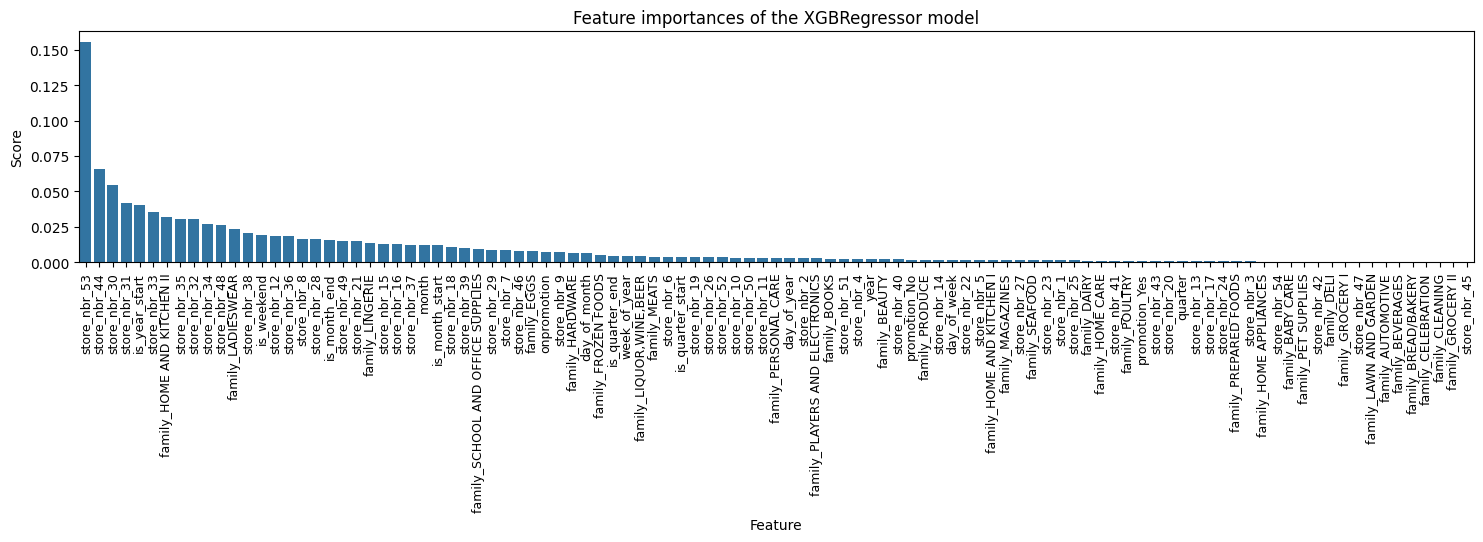

In [146]:
plt.figure(figsize=(18, 3))
sns.barplot(f_importances_df, x = "Feature", y = "Score")

plt.title(f'Feature importances of the {best_model_name} model')

plt.xticks(rotation=90, fontsize=9)

plt.show()

#### Prepare the test dataset

In [147]:
# Load the sample submission data
sample_submission_df = pl.read_csv('Datasets/sample_submission.csv')

# Load the test data
test_df = pl.read_csv('Datasets/test.csv')

In [148]:
sample_submission_df.glimpse()

Rows: 28512
Columns: 2
$ id    <i64> 3000888, 3000889, 3000890, 3000891, 3000892, 3000893, 3000894, 3000895, 3000896, 3000897
$ sales <f64> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0



In [149]:
test_df.glimpse()

Rows: 28512
Columns: 5
$ id          <i64> 3000888, 3000889, 3000890, 3000891, 3000892, 3000893, 3000894, 3000895, 3000896, 3000897
$ date        <str> '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16'
$ store_nbr   <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ family      <str> 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI'
$ onpromotion <i64> 0, 0, 2, 20, 0, 12, 0, 25, 45, 18



##### Sales forecast

In [150]:
sales_forecast = best_model.predict(test_df.to_pandas())
sales_forecast

array([ -14.627369,  -14.627369,  -14.847239, ..., 1532.7638  ,
        113.29788 ,   31.611496], dtype=float32)

In [151]:
submission_df = pd.DataFrame(
    {
        'id': test_df.to_pandas()['id'],
        'sales': sales_forecast
    }
)
submission_df

,id,sales
0,3000888,-14.627369
1,3000889,-14.627369
2,3000890,-14.847239
3,3000891,2211.330811
4,3000892,-14.627369
...,...,...
28507,3029395,395.653259
28508,3029396,96.345100
28509,3029397,1532.763794
28510,3029398,113.297882


##### Visualize the forcast of the best ML model

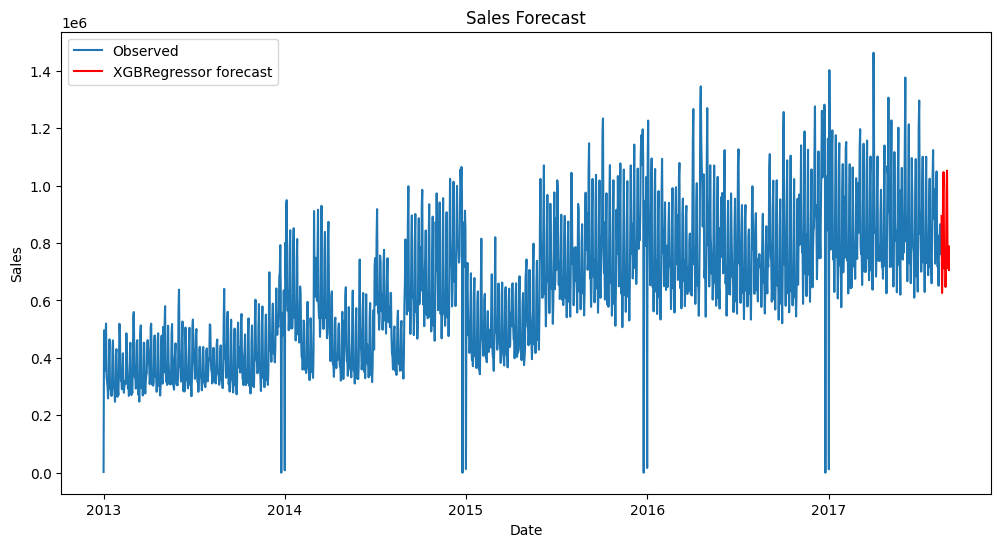

In [153]:
plot_data_forecast = (
    pd.DataFrame(
        {
            'date': test_df['date'],
            'sales': sales_forecast
        }
    )
    .groupby('date')
    ['sales'].sum()
    .reset_index()
    .set_index('date')   
)

plot_data_forecast.index = plot_data_forecast.index.astype('datetime64[ns]')

plot_data_train = (
    train_dataset[['date', 'sales']]
    .to_pandas()
    .groupby('date')
    ['sales'].sum()
    .reset_index()
    .set_index('date')
)
    
plot_data_train.index = plot_data_train.index.astype('datetime64[ns]')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_data_train, label='Observed')
plt.plot(plot_data_forecast, label=f'{best_model_name} forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

**Key Insights**

- Model Performance: The XGBRegressor model has been identified as the best performer based on the RMSLE metric.

- Forecast Visualization: The plot shows the observed sales data in blue and the forecasted sales data in red, demonstrating the model's ability to capture sales trends.

- Future Steps: To further refine the model, consider hyperparameter tuning, adding more features, and using cross-validation for robustness.

In [152]:
##### Visualize the forcast of the best ML model